<a href="https://colab.research.google.com/github/octavianosilva/data_science/blob/main/O_Mist%C3%A9rio_da_Espa%C3%A7onave_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# O Mistério da Espaçonave Titanic

<center><img alt="SpaceShip"  src='https://64.media.tumblr.com/d994c3b1c3adb94ac65692a599aae700/5866f6929b208337-cb/s540x810/bc492d78a4dc5a31fe7c5b42c1fff9bcd5938c9d.gif'></center>

Fonte: [Tumblr](https://64.media.tumblr.com/d994c3b1c3adb94ac65692a599aae700/5866f6929b208337-cb/s540x810/bc492d78a4dc5a31fe7c5b42c1fff9bcd5938c9d.gif).


O Ano é 2912, uma época que entrará para história pela inauguração da Espaçonave Titanic que está transportando quase 13 mil passageiros para três exoplanetas recém-habitáveis orbitando estrelas próximas.

Infelizmente, assim como seu homônimo de 1000 anos atrás, houve imprevistos, talvez essa seja uma maldição carregada por seu nome. Nossa equipe recebeu uma transmissão quatro anos luz de distância informando uma terrível situação.

Enquanto contornava Alpha Centauri a caminho de seu primeiro destino - 55 Cancri E - a Espaçonave Titanic colidiu com uma anomalia do espaço-tempo escondida em uma nuvem de poeira, que teletransportou quase metade de seus passageiros para uma dimensão alternativa! 

Para ajudar a equipe de resgate a localizar estes passageiros que foram transportados, recebemos a missão de prever quais passageiros foram teletransportados pela anomalia usando os registros recuperados do sistema de computador danificado da Espaçonave. 

O primeiro passo para podermos realizar as previsões é entender como os dados estão em relação à qualidade e à informação que entregam.

# Importando as Bibliotecas e as Bases de Dados

Os dados que serão utilizados neste projeto, podem ser encontrados em uma competição do [Kaggle](https://www.kaggle.com/competitions/spaceship-titanic/overview).

Importando as bibliotecas que serão utilizadas para solucionar o problema:

In [100]:
# Pacote que contém um grupo de bibliotecas - execute "lazy_imports()" para saber quais.
!pip install pyforest -q
import pyforest

# Importando o método SimpleImputer para preencher valores nulos
from sklearn.impute import SimpleImputer

# Importando a biblioteca para gerar valores aleatórios
from random import randint

# Importando o timer para calcular o tempo de execução dos códigos
import time

# Importando as bibliotecas para a modelagem da solução
!pip install scikit-plot -q
import scikitplot as skplt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix, plot_roc
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

## Otimização de Modelos
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

# Ignorar os alertas de atualizações
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

Importando os dados baixados da competição no Kaggle:

In [101]:
# Importando as bases de dados
base_treino = pd.read_csv('train.csv')
base_teste = pd.read_csv('test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Analisando a Qualidade dos Dados

Antes de explorarmos os dados em busca de informações relevantes, devemos avaliar a qualidade desses dados.

Para isso, vamos responder as seguintes perguntas:

1. Qual o tamanho das bases de dados importadas? Quantas entradas e colunas?

2. Qual o significado de cada coluna presente na base de dados?

3. Qual o tipo dessas colunas?

4. Quantos valores distintos existem em cada coluna?

5. Existem valores nulos nas bases importadas?

6. Como os dados estão distribuídos estatisticamente? Existem outliers nas colunas numéricas?

Ao respondermos estas perguntas, poderemos identificar se há a necessidade de tratarmos os dados para melhorarmos a qualidade destes e definir quais abordagens de tratamento para cada caso identificado.

## Obtendo o Tamanho das Bases de Dados

Vamos obter a quantidade de entradas e de colunas para cada base de dados importada:

In [102]:
# Quantidade de entradas e colunas da base de treino
print('A base de treino possui {} entradas e {} colunas.'.format(base_treino.shape[0],base_treino.shape[1]))

A base de treino possui 8693 entradas e 14 colunas.


In [103]:
# Quantidade de entradas e colunas da base de teste
print('A base de teste possui {} entradas e {} colunas.'.format(base_teste.shape[0],base_teste.shape[1]))

A base de teste possui 4277 entradas e 13 colunas.


## Descrevendo as Colunas nas Bases de Dados

Vamos agora entender o significado de cada coluna presente nas bases de dados:

* `PassengerId`: ID único de cada passageiro. Os valores possuem a seguinte estrutura gggg_pp, onde 'gggg' indica o grupo com quem o passageiro está viajando e 'pp' indica seu número dentro deste grupo. Geralmente pessoas dentro do mesmo grupo são da mesma família, porém há casos em que não possuem relações familiares;

* `HomePlanet`: Informa em qual Planeta o passageiro embarcou na nave, normalmente é o Planeta de residência desse passageiro;

* `CryoSleep`: Indica se o passageiro optou por ser colocado em animação suspensa durante a viagem. Os passageiros em sono criogênico estão confinados em suas cabines;

* `Cabin`: O número da cabine onde o passageiro está hospedado. Assume o formato deck/num/side, onde o lado pode ser P para bombordo ou S para estibordo;

* `Destination`: O planeta para o qual o passageiro irá desembarcar;

* `Age`: Informa a idade do passageiro;

* `VIP`: Se o passageiro pagou para receber serviços especiais VIP durante a viagem;

* `RoomService, FoodCourt, ShoppingMall, Spa, VRDeck`: Valor que o passageiro faturou em cada uma das muitas comodidades de luxo da Espaçonave Titanic;

* `Name`: Primeiro e último nome do passageiro;

* `Transported `: Se o passageiro foi transportado para outra dimensão. Esta é a coluna alvo para o problema.

## Observando os Tipos das Colunas

É importante conhecer os tipos de cada uma das variáveis (colunas) para identificar possíveis erros de importação e também para futuras análises:

In [104]:
# Obtendo os tipos das colunas na base de treino
base_treino.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [105]:
# Obtendo os tipos das colunas na base de teste
base_teste.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

Vamos checar as primeiras entradas da base de treino. Não há necessidade de checar a de teste uma vez que ela possui as mesmas colunas e com os mesmos tipos (com exceção da coluna alvo `Transported`) que a base de treino.

In [106]:
# Observando as primeiras entradas da base de treino
base_treino.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Observando os tipos das colunas e as primeiras entradas da base de dados, podemos ver que existem algumas informações diferentes, por exemplo: as colunas `CryoSleep` e `VIP` são do tipo objeto, porém seus balores são booleanos, assim como a coluna `Transported`, que está no formato booleano correto 'bool'.

Podemos converter essas três colunas para o tipo binário, dessa forma podemos utilizar estas colunas em modelagens matemáticas posteriormente.

## Obtendo a Quantidade de Valores Distintos de cada Coluna Categórica

Primeiramente, precisamos identificar quais são as colunas categóricas, que neste caso são: `HomePlanet` e `Destination`.

In [107]:
# Obtendo a quantidade de valores distintos da coluna HomePlanet
print('A coluna HomePlanet possui {} valores distintos, sendo eles: {}'.format(base_treino.HomePlanet.nunique(), base_treino.HomePlanet.unique()[:3]))

A coluna HomePlanet possui 3 valores distintos, sendo eles: ['Europa' 'Earth' 'Mars']


In [108]:
# Obtendo a quantidade de valores distintos da coluna Destination
print('A coluna Destination possui {} valores distintos, sendo eles: {}'.format(base_treino.Destination.nunique(), base_treino.Destination.unique()[:3]))

A coluna Destination possui 3 valores distintos, sendo eles: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']


Existem algumas colunas de ID que possuem informações interessantes que podem ser convertidas em categóricas, por exemplo:

* `PassengerId`: vimos que essa variável possui duas informações, uma para o grupo que o passageiro está viajando junto e outro para o número de identificação dele dentro deste grupo. Neste caso, podemos separar a informação referente ao grupo em uma nova coluna categórica;

* `Cabin`: esta possui três informações, ou seja, também podemos separá-las em três novas colunas categóricas.

## Checando a Quantidade de Valores Nulos

Valores nulos não possuem nenhuma informação analítica e são prejudiciais para modelos matemáticos, dessa forma devemos identificar se há valores nulos nas bases importadas:

In [109]:
# Obtendo a quantidade de valores nulos na base de treino (%)
base_treino.isnull().sum()/base_treino.shape[0]*100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [110]:
# Obtendo a quantidade de valores nulos na base de teste (%)
base_teste.isnull().sum()/base_teste.shape[0]*100

PassengerId     0.000000
HomePlanet      2.034136
CryoSleep       2.174421
Cabin           2.338087
Destination     2.151040
Age             2.127660
VIP             2.174421
RoomService     1.917232
FoodCourt       2.478373
ShoppingMall    2.291326
Spa             2.361468
VRDeck          1.870470
Name            2.197802
dtype: float64

Acima temos a confirmação de que existem valores nulos em ambas as bases de dados, porém estes valores não passam de uma proporção de 3%, o que é uma quantidade bem pequena.

Vamos checar algumas entradas que possuem valores nulos antes de tomar alguma medida em relação a eles:

In [111]:
# Checando as entradas nulas da base de treino
base_teste.loc[base_teste['CryoSleep'].isnull()].head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
68,0156_01,Mars,NaN,F/34/P,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,Tures Upead
78,0175_02,Earth,NaN,G/25/P,55 Cancri e,8.0,False,0.0,0.0,0.0,0.0,0.0,Elody Benney
92,0208_01,Earth,NaN,G/33/P,TRAPPIST-1e,40.0,False,44.0,0.0,565.0,0.0,18.0,Mael Vales
99,0227_01,Earth,NaN,NaN,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Buckentry
165,0349_01,Europa,NaN,A/4/S,TRAPPIST-1e,33.0,False,0.0,1030.0,0.0,3490.0,5832.0,Meropus Ametic


Com as cinco entradas da base de treino acima, podemos ver que nas entradas que possuem dados ausentes temos algumas colunas preenchidas, ou seja, são entradas que possuem informações úteis. 

Neste caso não é interessante remover esta entrada por ter apenas uma ou duas colunas nulas.

Para não perder informações, iremos tratar estes dados nulos em uma etapa de tratamento posteriormente.

## Observando o Descritivo Estatístico das Bases de Dados

Com a função `describe` do Python, é possível obter o resumo estatístico dos dados, como média, desvio padrão, mediana, etc...

In [112]:
# Checando o resumo estatístico da base de treino
base_treino.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [113]:
# Checando o resumo estatístico da base de teste
base_teste.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


Com o descritivo estatístico podemos ver que temos outliers (valores discrepantes) bem notáveis em ambas as bases, onde temos 75% dos valores dentro da casa das dezenas e valores máximos em milhares.

Valores discrepantes podem enviesar ou podem ser necessárias para generalizar previsões em modelos matemáticos, então é bastante importante analisar mais a fundo estes valores antes de tomar alguma decisão quanto a necessidade de tratamento ou de aproveitamento.

Iremos tratar este assunto das outliers mais a fundo durante a etapa de tratamento dos dados que será realizada após a análise de qualidade dos dados.

## Conclusão da Análise da Qualidade dos Dados

No decorrer da análise nos deparamos com algumas informações que podem ser úteis de serem trabalhadas e outras que precisam de tratamento, que são os seguintes itens: 

1. Converter as colunas booleanas (`CryoSleep, VIP, Transported`) para o tipo binário;

2. Separar as informações das colunas `PassengerId` e `Cabin` em informações categóricas; Além desta separação, converter a coluna `PassangerId` original no índex das bases de dados;

3. Tratar os dados nulos conservando as entradas;

4. Identificar e tratar as outliers nas variáveis numéricas.

# Tratamento dos Dados

Nesta etapa iremos realizar os tratamentos apontados pela análise da qualidade dos dados, para que possamos realizar uma exploratória em busca de entender o problema.

## Convertendo as Colunas Booleanas

Como vimos durante a checagem dos tipos das colunas presentes nas bases, temos variáveis booleanas, com valores True e False, com a tipagem Objeto e não Bool, como também vimos que existe uma com a mesma estrutura, porém já com o tipo Bool. 

Neste caso vamos padronizar ambos os casos transformando essas colunas para o tipo numérico, dessa forma elas também poderão ser interpretadas por modelos matemáticos.

In [114]:
# Convertendo os valores True e False, por 1 e 0 respectivamente na base de treino
base_treino[['CryoSleep','VIP','Transported']] = base_treino[['CryoSleep','VIP','Transported']].replace({False: 0, True: 1})

# Checando o resultado
base_treino.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [115]:
# Convertendo os valores True e False, por 1 e 0 respectivamente na base de teste
base_teste[['CryoSleep','VIP']] = base_teste[['CryoSleep','VIP']].replace({False: 0, True: 1})

# Checando o resultado
base_teste.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,1.0,G/3/S,TRAPPIST-1e,27.0,0.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,0.0,F/4/S,TRAPPIST-1e,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,1.0,C/0/S,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,0.0,C/1/S,TRAPPIST-1e,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,0.0,F/5/S,TRAPPIST-1e,20.0,0.0,10.0,0.0,635.0,0.0,0.0,Brence Harperez


Vamos checar os tipos dessas colunas para cada base:

In [116]:
# Checando os tipos das três colunas na base de treino
base_treino[['CryoSleep','VIP','Transported']].dtypes

CryoSleep      float64
VIP            float64
Transported      int64
dtype: object

In [117]:
# Checando os tipos das duas colunas boolenanas na base de teste
base_teste[['CryoSleep','VIP']].dtypes

CryoSleep    float64
VIP          float64
dtype: object

Agora que as colunas foram convertidas com sucesso, vamos passar para o próximo item de tratamento.

## Segmentando Colunas

Também vimos que existem colunas que podem ser segmentadas para dar origem a novas colunas categóricas, que são: `PassengerId` e `Cabin`.

Vamos começar com a coluna `PassengerId`, que como vimos possui duas informações, uma de grupo e outra o número do passageiro dentro do grupo a qual pertence. Dessa forma iremos criar uma nova coluna para cada uma dessas informarções:

In [118]:
# Copiando a base de treino original
base_treino_tratado = base_treino.copy()

# Separando as informações da coluna PassengerId
base_treino_tratado['PassengerGroup'] = base_treino_tratado['PassengerId'].apply(lambda x: x.split('_')[0])
base_treino_tratado['PassengerNumbInGroup'] = base_treino_tratado['PassengerId'].apply(lambda x: x.split('_')[1])

# Convertendo os valores das novas colunas para o tipo numérico
base_treino_tratado['PassengerGroup'] = pd.to_numeric(base_treino_tratado['PassengerGroup'])
base_treino_tratado['PassengerNumbInGroup'] = pd.to_numeric(base_treino_tratado['PassengerNumbInGroup'])

# Checando as primeiras entradas da base de dados treinada
base_treino_tratado.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,PassengerNumbInGroup
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,1,1
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,2,1
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,3,1
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,3,2
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,4,1


Vamos realizar a separação também na base de teste:

In [119]:
# Copiando a base de treino original
base_teste_tratado = base_teste.copy()

# Separando as informações da coluna PassengerId
base_teste_tratado['PassengerGroup'] = base_teste_tratado['PassengerId'].apply(lambda x: x.split('_')[0])
base_teste_tratado['PassengerNumbInGroup'] = base_teste_tratado['PassengerId'].apply(lambda x: x.split('_')[1])

# Convertendo os valores das novas colunas para o tipo numérico
base_teste_tratado['PassengerGroup'] = pd.to_numeric(base_teste_tratado['PassengerGroup'])
base_teste_tratado['PassengerNumbInGroup'] = pd.to_numeric(base_teste_tratado['PassengerNumbInGroup'])

# Checando as primeiras entradas da base de dados treinada
base_teste_tratado.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,PassengerGroup,PassengerNumbInGroup
0,0013_01,Earth,1.0,G/3/S,TRAPPIST-1e,27.0,0.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,13,1
1,0018_01,Earth,0.0,F/4/S,TRAPPIST-1e,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,18,1
2,0019_01,Europa,1.0,C/0/S,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,19,1
3,0021_01,Europa,0.0,C/1/S,TRAPPIST-1e,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,21,1
4,0023_01,Earth,0.0,F/5/S,TRAPPIST-1e,20.0,0.0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,23,1


Agora vamos segmentar a coluna `Cabin` que possui três informações: Deck, Número da Cabine e lado da cabine (Bombordo ou Estibordo).

Como temos alguns dados ausentes, vamos criar uma estrutura nula 'NaN/999/NaN' para que possa ocorrer a segmentação.

In [120]:
# Converter as entradas NaN para a estrutura 'NaN/NaN/NaN'
base_treino_tratado['Cabin'] = base_treino_tratado['Cabin'].replace(np.nan,'999/999/999')

# Separando as informações da coluna Cabin na base de treino
base_treino_tratado['Deck'] = base_treino_tratado['Cabin'].apply(lambda x: x.split('/')[0])
base_treino_tratado['NumCabin'] = base_treino_tratado['Cabin'].apply(lambda x: x.split('/')[1])
base_treino_tratado['Side'] = base_treino_tratado['Cabin'].apply(lambda x: x.split('/')[2])

# Converter a coluna NumCabin para o tipo numérico
base_treino_tratado['NumCabin'] = pd.to_numeric(base_treino_tratado['NumCabin'])

# Revertendo os valores 999 que significam NaN nas novas colunas para np.Nan
base_treino_tratado['Deck'] = base_treino_tratado['Deck'].replace('999',np.nan)
base_treino_tratado['NumCabin'] = base_treino_tratado['NumCabin'].replace(999,np.nan)
base_treino_tratado['Side'] = base_treino_tratado['Side'].replace('999',np.nan)

# Dropando a coluna Cabin original
base_treino_tratado.drop('Cabin', axis=1, inplace=True)

# Checando as primeiras entradas da base de treino
base_treino_tratado.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,PassengerNumbInGroup,Deck,NumCabin,Side
0,0001_01,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,1,1,B,0.0,P
1,0002_01,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,2,1,F,0.0,S
2,0003_01,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,3,1,A,0.0,S
3,0003_02,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,3,2,A,0.0,S
4,0004_01,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,4,1,F,1.0,S


Agora vamos realizar as mesmas segmentações na base de teste:

In [121]:
# Converter as entradas NaN para a estrutura 'NaN/NaN/NaN'
base_teste_tratado['Cabin'] = base_teste_tratado['Cabin'].replace(np.nan,'999/999/999')

# Separando as informações da coluna Cabin na base de teste
base_teste_tratado['Deck'] = base_teste_tratado['Cabin'].apply(lambda x: x.split('/')[0])
base_teste_tratado['NumCabin'] = base_teste_tratado['Cabin'].apply(lambda x: x.split('/')[1])
base_teste_tratado['Side'] = base_teste_tratado['Cabin'].apply(lambda x: x.split('/')[2])

# Converter a coluna NumCabin para o tipo numérico
base_teste_tratado['NumCabin'] = pd.to_numeric(base_teste_tratado['NumCabin'])

# Revertendo os valores 999 na nova coluna NumCabin para NaN
base_teste_tratado['Deck'] = base_teste_tratado['Deck'].replace('999',np.nan)
base_teste_tratado['NumCabin'] = base_teste_tratado['NumCabin'].replace(999,np.nan)
base_teste_tratado['Side'] = base_teste_tratado['Side'].replace('999',np.nan)

# Dropando a coluna Cabin original
base_teste_tratado.drop('Cabin', axis=1, inplace=True)

# Checando as primeiras entradas da base de teste
base_teste_tratado.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,PassengerGroup,PassengerNumbInGroup,Deck,NumCabin,Side
0,0013_01,Earth,1.0,TRAPPIST-1e,27.0,0.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,13,1,G,3.0,S
1,0018_01,Earth,0.0,TRAPPIST-1e,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,18,1,F,4.0,S
2,0019_01,Europa,1.0,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,19,1,C,0.0,S
3,0021_01,Europa,0.0,TRAPPIST-1e,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,21,1,C,1.0,S
4,0023_01,Earth,0.0,TRAPPIST-1e,20.0,0.0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,23,1,F,5.0,S


A nova coluna `Side` possui apenas dois valores (P e S), mas para que essa informação possa ser interpretada por modelos matemáticos, vamos converter estes valores por 0 e 1, onde Bombordo = 0 e Estibordo = 1.

In [122]:
# Converter as entradas os valores P e S da coluna Side por 0 e 1
base_treino_tratado['Side'] = base_treino_tratado['Side'].replace({'P':0,'S':1})
base_teste_tratado['Side'] = base_teste_tratado['Side'].replace({'P':0,'S':1})

# Checando a conversão na base de treino
base_treino_tratado.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,PassengerNumbInGroup,Deck,NumCabin,Side
0,0001_01,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,1,1,B,0.0,0.0
1,0002_01,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,2,1,F,0.0,1.0
2,0003_01,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,3,1,A,0.0,1.0
3,0003_02,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,3,2,A,0.0,1.0
4,0004_01,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,4,1,F,1.0,1.0


Foi levantado também durante a análise que seria necessário converter a coluna `PassengerId` original no índex das bases, porém como isso é apenas voltado para a modelagem, deixaremos para realizar esta conversão na preparação para a modelagem.

## Tratando os Dados Nulos

Durante a análise vimos que temos uma proporção bem baixa de valores nulos, porém estes valores estão distribuídos, ou seja, remover uma entrada por conta de uma única coluna vaga seria uma perda de informação, o que não é uma boa abordagem.

Visando sempre conservar o máximo de informações que podem ser relevantes para os modelos, vamos optar por manter as entradas e preencher as colunas com valores nulos.

Para preencher os valores nulos, temos a biblioteca **Scikit-Learn** que possui um módulo chamado de *Simple Imputer*, onde:

* Para as colunas numéricas: usaremos a mediana das colunas para o preenchimento, uma vez que identificamos a presença de outliers.

* Para as colunas categóricas: precisaremos estudar mais a fundo estes dados para então decidir qual abordagem de preenchimento utilizaremos.

Antes de realizarmos as imputações descritas acima, precisamos nos atentar a um fato que é: aqueles passageiros que estão em sono criogênico não podem consumir nenhum serviço, afinal eles estão dormindo até a hora de seus desembarques nos seus respectivos destinos. Dessa forma, iremos substituir todas as entradas nulas das colunas de serviços referentes aos passageiros em sono criogênico para o valor zero.

In [123]:
# Localizando os passageiros em sono criogênico (Base de Treino)
lista_passageiros_criogenia_treino = base_treino_tratado['PassengerId'].loc[base_treino_tratado['CryoSleep'] == 1].to_list()

# Convertendo todas as entradas nulas das colunas dentro desta lista
for i in base_treino_tratado['PassengerId']:
  if i in lista_passageiros_criogenia_treino:
    base_treino_tratado['VIP'].loc[base_treino_tratado['PassengerId'] == i] = 0
    base_treino_tratado['RoomService'].loc[base_treino_tratado['PassengerId'] == i] = 0
    base_treino_tratado['FoodCourt'].loc[base_treino_tratado['PassengerId'] == i] = 0
    base_treino_tratado['ShoppingMall'].loc[base_treino_tratado['PassengerId'] == i] = 0
    base_treino_tratado['Spa'].loc[base_treino_tratado['PassengerId'] == i] = 0
    base_treino_tratado['VRDeck'].loc[base_treino_tratado['PassengerId'] == i] = 0
  
  else:
    None

# Localizando os passageiros em sono criogênico (Base de Teste)
lista_passageiros_criogenia_teste = base_teste_tratado['PassengerId'].loc[base_teste_tratado['CryoSleep'] == 1].to_list()

# Convertendo todas as entradas nulas das colunas dentro desta lista
for i in base_teste_tratado['PassengerId']:
  if i in lista_passageiros_criogenia_teste:
    base_teste_tratado['VIP'].loc[base_teste_tratado['PassengerId'] == i] = 0
    base_teste_tratado['RoomService'].loc[base_teste_tratado['PassengerId'] == i] = 0
    base_teste_tratado['FoodCourt'].loc[base_teste_tratado['PassengerId'] == i] = 0
    base_teste_tratado['ShoppingMall'].loc[base_teste_tratado['PassengerId'] == i] = 0
    base_teste_tratado['Spa'].loc[base_teste_tratado['PassengerId'] == i] = 0
    base_teste_tratado['VRDeck'].loc[base_teste_tratado['PassengerId'] == i] = 0
  
  else:
    None

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Agora vamos realizar o processo inverso que fizemos para a coluna `CryoSleep`, uma vez que aqueles passageiros que possuem valores nulos nesta coluna, mas que efeturam algum pagamento em qualquer um dos serviços oferecidos, significa que não estão em sono criogênico, portanto substituiremos a entrada nula nesta coluna por zero, ou seja, não está dormindo.

In [124]:
# Obtendo uma lista dos passageiros que estão acordados (consumiram em algum serviço da Espaçonave) (Base de Treino)
lista_passageiros_acordados_treino = base_treino_tratado['PassengerId'].loc[(base_treino_tratado['VIP'] > 0) |
                                                                            (base_treino_tratado['RoomService'] > 0) |
                                                                            (base_treino_tratado['FoodCourt'] > 0) |
                                                                            (base_treino_tratado['ShoppingMall'] > 0) |
                                                                            (base_treino_tratado['Spa'] > 0) |
                                                                            (base_treino_tratado['VRDeck'] > 0)].to_list()

# Convertendo todas as entradas nulas da coluna CryoSleep para 0
for i in base_treino_tratado['PassengerId']:
  if i in lista_passageiros_acordados_treino:
    base_treino_tratado['CryoSleep'].loc[base_treino_tratado['PassengerId'] == i] = 0

  else:
    None

# Obtendo uma lista dos passageiros que estão acordados (consumiram em algum serviço da Espaçonave) (Base de Teste)
lista_passageiros_acordados_teste = base_teste_tratado['PassengerId'].loc[(base_teste_tratado['VIP'] > 0) |
                                                                          (base_teste_tratado['RoomService'] > 0) |
                                                                          (base_teste_tratado['FoodCourt'] > 0) |
                                                                          (base_teste_tratado['ShoppingMall'] > 0) |
                                                                          (base_teste_tratado['Spa'] > 0) |
                                                                          (base_teste_tratado['VRDeck'] > 0)].to_list()

# Convertendo todas as entradas nulas da coluna CryoSleep para 0
for i in base_teste_tratado['PassengerId']:
  if i in lista_passageiros_acordados_teste:
    base_teste_tratado['CryoSleep'].loc[base_teste_tratado['PassengerId'] == i] = 0

  else:
    None

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Podem existir casos em que os passageiros que não estão em sono criogênico não consumam nenhum tipo de serviço dentro da Espaçonave, portanto simplesmente considerar que todos os que não consumiram nenhum serviço estão em sono criogênico, estaríamos enviesando os dados, o que não é bom para as análises e previsões.

Dito isso, vamos checar quantas pessoas estão acordadas mas que não consumiram nada:

In [125]:
# Obtendo uma lista dos passageiros acordados que não consumiram nenhum serviço
lista_acordados_sem_consumo = base_treino_tratado['PassengerId'].loc[(base_treino_tratado['CryoSleep'] == 0) &
                                                                    (base_treino_tratado['VIP'] == 0) &
                                                                    (base_treino_tratado['RoomService'] == 0) &
                                                                    (base_treino_tratado['FoodCourt'] == 0) &
                                                                    (base_treino_tratado['ShoppingMall'] == 0) &
                                                                    (base_treino_tratado['Spa'] == 0) &
                                                                    (base_treino_tratado['VRDeck'] == 0)].to_list()

# Exibindo a quantidade de passageiros obtida
print('Temos {} passageiros acordados que não consumiram nenhum tipo de serviço.'.format(len(lista_acordados_sem_consumo)))                                              

Temos 450 passageiros acordados que não consumiram nenhum tipo de serviço.


Agora que confirmamos a hipótese que há passageiros que não consumiram nada durante a viagem, vamos observar as entradas dos passageiros que ainda possuem dados nulos na coluna `CryoSleep`:

In [126]:
# Obtendo a quantidade de entradas da coluna CryoSleep que ainda estão nulas
base_treino_tratado.loc[base_treino_tratado['CryoSleep'].isnull()].shape[0]

98

Vamos analisar as entradas dos serviços em relação ao sono criogênico:

In [127]:
# Observando as entradas
base_treino_tratado[['PassengerId','CryoSleep','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].loc[base_treino_tratado['CryoSleep'].isnull()]

,PassengerId,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
92,0099_02,NaN,0.0,0.0,0.0,0.0,0.0,0.0
111,0115_01,NaN,0.0,0.0,0.0,0.0,0.0,NaN
175,0198_01,NaN,0.0,0.0,0.0,0.0,0.0,0.0
266,0290_03,NaN,0.0,0.0,0.0,0.0,0.0,0.0
392,0433_01,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
8501,9076_01,NaN,0.0,0.0,0.0,0.0,0.0,0.0
8612,9193_01,NaN,0.0,0.0,0.0,0.0,0.0,0.0
8620,9197_01,NaN,0.0,0.0,0.0,0.0,0.0,0.0
8651,9227_05,NaN,0.0,0.0,0.0,0.0,0.0,0.0


Podemos perceber que todas as 98 entradas nulas que sobraram na coluna `CryoSleep`, não possuem gastos em serviços, ou seja, podemos convertê-las para o valor 1, que representa os passageiros que estão em sono criogênico.

Pode-se perceber também, que existem entradas nos serviços que estão nulas, e como confirmamos que existem pessoas acordadas que também não gastaram com nada, vamos utilizar essas entradas acima para converter estes valores nulos das colunas de serviços para zero, dessa forma o restante dos valores nulos podem passar por outro tipo de imputação.

In [128]:
# Obtendo uma lista do restante dos passageiros que possuem dados nulos na coluna CryoSleep (Base de Treino)
lista_cryo_nulos_treino = base_treino_tratado['PassengerId'].loc[base_treino_tratado['CryoSleep'].isnull()].to_list()

# Convertendo todas as entradas nulas das colunas dentro desta lista
for i in base_treino_tratado['PassengerId']:
  if i in lista_cryo_nulos_treino:
    base_treino_tratado['VIP'].loc[base_treino_tratado['PassengerId'] == i] = 0
    base_treino_tratado['RoomService'].loc[base_treino_tratado['PassengerId'] == i] = 0
    base_treino_tratado['FoodCourt'].loc[base_treino_tratado['PassengerId'] == i] = 0
    base_treino_tratado['ShoppingMall'].loc[base_treino_tratado['PassengerId'] == i] = 0
    base_treino_tratado['Spa'].loc[base_treino_tratado['PassengerId'] == i] = 0
    base_treino_tratado['VRDeck'].loc[base_treino_tratado['PassengerId'] == i] = 0

# Convertendo os valores nulos da coluna CryoSleep para 1
base_treino_tratado['CryoSleep'].fillna(1,inplace=True)

# Obtendo uma lista do restante dos passageiros que possuem dados nulos na coluna CryoSleep (Base de Teste)
lista_cryo_nulos_teste = base_treino_tratado['PassengerId'].loc[base_treino_tratado['CryoSleep'].isnull()].to_list()

# Convertendo todas as entradas nulas das colunas dentro desta lista
for i in base_teste_tratado['PassengerId']:
  if i in lista_cryo_nulos_teste:
    base_teste_tratado['VIP'].loc[base_teste_tratado['PassengerId'] == i] = 0
    base_teste_tratado['RoomService'].loc[base_teste_tratado['PassengerId'] == i] = 0
    base_teste_tratado['FoodCourt'].loc[base_teste_tratado['PassengerId'] == i] = 0
    base_teste_tratado['ShoppingMall'].loc[base_teste_tratado['PassengerId'] == i] = 0
    base_teste_tratado['Spa'].loc[base_teste_tratado['PassengerId'] == i] = 0
    base_teste_tratado['VRDeck'].loc[base_teste_tratado['PassengerId'] == i] = 0

# Convertendo os valores nulos da coluna CryoSleep para 1
base_teste_tratado['CryoSleep'].fillna(1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Vamos checar a quantidade de dados nulos restantes nas colunas após os tratamentos realizados até agora:

In [129]:
# Checando os valores nulos da base de treino (%)
base_treino_tratado.isnull().sum()/base_treino_tratado.shape[0]*100

PassengerId             0.000000
HomePlanet              2.312205
CryoSleep               0.000000
Destination             2.093639
Age                     2.059128
VIP                     1.426435
RoomService             1.299896
FoodCourt               1.288393
ShoppingMall            1.253882
Spa                     1.334407
VRDeck                  1.391925
Name                    2.300702
Transported             0.000000
PassengerGroup          0.000000
PassengerNumbInGroup    0.000000
Deck                    2.289198
NumCabin                2.358219
Side                    2.289198
dtype: float64

In [130]:
# Checando os valores nulos da base de treino (%)
base_teste_tratado.isnull().sum()/base_teste_tratado.shape[0]*100

PassengerId             0.000000
HomePlanet              2.034136
CryoSleep               0.000000
Destination             2.151040
Age                     2.127660
VIP                     1.496376
RoomService             1.332710
FoodCourt               1.566519
ShoppingMall            1.472995
Spa                     1.379472
VRDeck                  1.192425
Name                    2.197802
PassengerGroup          0.000000
PassengerNumbInGroup    0.000000
Deck                    2.338087
NumCabin                2.338087
Side                    2.338087
dtype: float64

Ainda existem dados nulos nas colunas de serviços, vamos analisá-las mais a fundo:

In [131]:
base_treino_tratado.loc[base_treino_tratado['RoomService'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,PassengerNumbInGroup,Deck,NumCabin,Side
35,0031_03,Mars,0.0,TRAPPIST-1e,20.0,0.0,NaN,0.0,1750.0,990.0,0.0,Dontch Datie,1,31,3,F,9.0,0.0
132,0141_01,Mars,0.0,TRAPPIST-1e,31.0,0.0,NaN,0.0,97.0,0.0,0.0,Pyrohs Harte,0,141,1,F,30.0,0.0
170,0193_02,Mars,0.0,TRAPPIST-1e,23.0,0.0,NaN,0.0,8.0,1072.0,0.0,Frook Raf,0,193,2,F,41.0,0.0
220,0234_01,Earth,0.0,TRAPPIST-1e,43.0,0.0,NaN,888.0,0.0,0.0,0.0,Keitha Josey,0,234,1,F,50.0,0.0
280,0310_01,Europa,0.0,TRAPPIST-1e,67.0,0.0,NaN,230.0,0.0,4476.0,241.0,Naviton Coudered,0,310,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8392,8970_01,Europa,0.0,55 Cancri e,28.0,0.0,NaN,3751.0,0.0,5025.0,11741.0,Batomam Clugeammy,0,8970,1,C,300.0,0.0
8425,8998_02,Earth,0.0,TRAPPIST-1e,47.0,0.0,NaN,1.0,0.0,967.0,5.0,Jonaye Englence,0,8998,2,E,591.0,1.0
8525,9101_01,Earth,0.0,TRAPPIST-1e,21.0,0.0,NaN,0.0,496.0,430.0,0.0,Gera Frazie,0,9101,1,F,1865.0,0.0
8534,9112_01,Mars,0.0,TRAPPIST-1e,28.0,0.0,NaN,0.0,0.0,0.0,0.0,Wealke Brin,0,9112,1,D,290.0,0.0


Como temos valores acima de zero para os outros serviços na mesma entrada que possui algum outro serviço com valor nulo, vamos realizar a imputação pela mediana nas colunas numéricas, como foi dito no início desta etapa de tratamento:

In [132]:
# Imputando os valores da mediana nas entradas nulas das colunas numéricas da base de treino
num_col_treino = base_treino_tratado[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].columns

imputer_num = SimpleImputer(missing_values=np.nan, strategy='median')
imputer_num_treino = imputer_num.fit(base_treino_tratado.loc[:,num_col_treino])
base_treino_tratado.loc[:,num_col_treino] = imputer_num_treino.transform(base_treino_tratado.loc[:,num_col_treino])

# Imputando os valores da mediana nas entradas nulas das colunas numéricas da base de teste
num_col_teste = base_teste_tratado[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].columns

imputer_num_teste = imputer_num.fit(base_teste_tratado.loc[:,num_col_teste])
base_teste_tratado.loc[:,num_col_teste] = imputer_num_teste.transform(base_teste_tratado.loc[:,num_col_teste])

<IPython.core.display.Javascript object>

Para a coluna `VIP`, podemos fazer um tratamento diferente: usaremos um valor aleatório para cada entrada nula, para que seja 0 ou 1, assim podemos generalizar mais essas entradas ao invés de simplesmente atribuir o valor mais frequente da coluna para todas essas entradas.

In [133]:
base_treino_tratado.loc[base_treino_tratado['VIP'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,PassengerNumbInGroup,Deck,NumCabin,Side
38,0036_01,Earth,0.0,55 Cancri e,15.0,NaN,0.0,492.0,48.0,20.0,401.0,Marina Leodger,0,36,1,F,8.0,1.0
102,0108_03,Earth,0.0,TRAPPIST-1e,0.0,NaN,0.0,0.0,0.0,0.0,0.0,Oline Handertiz,1,108,3,G,19.0,1.0
566,0593_01,Mars,0.0,TRAPPIST-1e,27.0,NaN,43.0,152.0,182.0,1.0,2005.0,Hon Kra,0,593,1,D,24.0,0.0
582,0607_01,Europa,0.0,TRAPPIST-1e,37.0,NaN,27.0,654.0,10.0,881.0,9568.0,Dyonium Hontichre,0,607,1,C,22.0,0.0
646,0679_01,Earth,0.0,TRAPPIST-1e,20.0,NaN,0.0,215.0,0.0,541.0,0.0,Vana Nichoan,0,679,1,G,104.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8365,8945_02,Europa,0.0,TRAPPIST-1e,21.0,NaN,3036.0,32.0,0.0,2.0,416.0,Zinonon Cralinal,0,8945,2,D,270.0,1.0
8367,8948_01,Europa,0.0,TRAPPIST-1e,57.0,NaN,0.0,13.0,0.0,52.0,11325.0,Sterfik Hetforhaft,0,8948,1,B,342.0,1.0
8428,9003_01,Earth,0.0,TRAPPIST-1e,23.0,NaN,2.0,167.0,0.0,0.0,555.0,Rence Llobsoney,1,9003,1,F,1744.0,1.0
8512,9081_06,Earth,0.0,PSO J318.5-22,16.0,NaN,0.0,0.0,761.0,0.0,0.0,Daryla Clemondsey,0,9081,6,F,1858.0,0.0


In [134]:
# Obtendo uma lista do restante dos passageiros que possuem dados nulos na coluna CryoSleep (Base de Treino)
lista_vip_nulos_treino = base_treino_tratado['PassengerId'].loc[base_treino_tratado['VIP'].isnull()].to_list()

# Convertendo os valores nulos da coluna VIP para um valor aleatório de 0 ou 1 para
for i in base_treino_tratado['PassengerId']:
  if i in lista_vip_nulos_treino:
    base_treino_tratado['VIP'].loc[base_treino_tratado['PassengerId'] == i] = randint(0,1)

# Obtendo uma lista do restante dos passageiros que possuem dados nulos na coluna CryoSleep (Base de Teste)
lista_vip_nulos_teste = base_teste_tratado['PassengerId'].loc[base_teste_tratado['VIP'].isnull()].to_list()

# Convertendo os valores nulos da coluna VIP para um valor aleatório de 0 ou 1 para
for i in base_teste_tratado['PassengerId']:
  if i in lista_vip_nulos_teste:
    base_teste_tratado['VIP'].loc[base_teste_tratado['PassengerId'] == i] = randint(0,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Vamos checar se os valores nulos das colunas numéricas foram corretamente preenchidas:

In [135]:
# Checando os valores nulos da base de treino (%)
base_treino_tratado.isnull().sum()/base_treino_tratado.shape[0]*100

PassengerId             0.000000
HomePlanet              2.312205
CryoSleep               0.000000
Destination             2.093639
Age                     0.000000
VIP                     0.000000
RoomService             0.000000
FoodCourt               0.000000
ShoppingMall            0.000000
Spa                     0.000000
VRDeck                  0.000000
Name                    2.300702
Transported             0.000000
PassengerGroup          0.000000
PassengerNumbInGroup    0.000000
Deck                    2.289198
NumCabin                2.358219
Side                    2.289198
dtype: float64

In [136]:
# Checando os valores nulos da base de treino (%)
base_teste_tratado.isnull().sum()/base_teste_tratado.shape[0]*100

PassengerId             0.000000
HomePlanet              2.034136
CryoSleep               0.000000
Destination             2.151040
Age                     0.000000
VIP                     0.000000
RoomService             0.000000
FoodCourt               0.000000
ShoppingMall            0.000000
Spa                     0.000000
VRDeck                  0.000000
Name                    2.197802
PassengerGroup          0.000000
PassengerNumbInGroup    0.000000
Deck                    2.338087
NumCabin                2.338087
Side                    2.338087
dtype: float64

Podemos ver que as colunas numéricas em ambas as bases foram corretamento preenchidas, restando apenas dados nulos nas colunas categóricas.

Geralmente podemos realizar a imputação em colunas categóricas com o a entrada mais frequênte de cada coluna, porém isso faria sentido para nossos dados?

Para as colunas categóricas: `HomePlanet e Destination`, não teríamos problemas em substituir os valores nulos pelos valores mais frequentes, porém para: `Name, Deck, NumCabin e Side` não tem muita lógica, pois:

* `Name`: nomes são únicos de cada pessoa, embora possam ocorrer casos onde passageiros possuem o mesmo nome, não seria bom forçarmos essa abordagem no sistema da espaçonave.

* `Deck e NumCabin`: exite um limite de cabines na espaçonave então não podemos jogar os passageiros sem dados em qualquer quarto que já pertence a algum outro grupo.

Vamos começar com as colunas que podemos substituir pelos valores mais frequentes entre as entradas:

In [137]:
# Imputando os valores mais frequentes nas entradas nulas das colunas da base de treino: HomePlanet e Destination
cat_col_treino = base_treino_tratado[['HomePlanet','Destination']].columns

imputer_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_cat_treino = imputer_cat.fit(base_treino_tratado.loc[:,cat_col_treino])
base_treino_tratado.loc[:,cat_col_treino] = imputer_cat.transform(base_treino_tratado.loc[:,cat_col_treino])

# Imputando os valores mais frequentes nas entradas nulas das colunas da base de teste: HomePlanet e Destination
cat_col_teste = base_teste_tratado[['HomePlanet','Destination']].columns

imputer_cat_teste = imputer_cat.fit(base_teste_tratado.loc[:,cat_col_teste])
base_teste_tratado.loc[:,cat_col_teste] = imputer_cat.transform(base_teste_tratado.loc[:,cat_col_teste])

# Checando se houve o preenchimento dos valores nulos
base_treino_tratado[['HomePlanet','Destination']].isnull().sum()

<IPython.core.display.Javascript object>

HomePlanet     0
Destination    0
dtype: int64

Para a coluna `Name` vamos apenas substituir as entradas nulas pela frase "Sem Registro", uma vez que o nome não irá influenciar na previsão do modelo:

In [138]:
# Convertendo as entradas nulas NaN da coluna Name por 'Sem Registro' em ambas as bases importadas
base_treino_tratado['Name'] = base_treino_tratado['Name'].replace(np.nan,'Sem Registro')
base_teste_tratado['Name'] = base_teste_tratado['Name'].replace(np.nan,'Sem Registro')

# Checando se a conversão foi realizada
print(base_treino_tratado['Name'].isnull().sum())
print(base_teste_tratado['Name'].isnull().sum())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0
0


As colunas que ainda possuem valores nulos são: `Deck`,`NumCabin` e `Side`.

Essas colunas possuem poucas entradas nulas, porém precisaríamos realizar uma análise ainda mais profunda, como por exemplo: identificar quais cabines estão vazias para remanejar os passageiros que estão com as informações destas colunas nulas. Dessa forma, seria um grande trabalho para apenas uma pequena proporção de dados nulos, nesse caso iremos remover esses valores nulos.



In [139]:
# Copiando a base tratada para remover as últimas entradas nulas da base de treino
base_treino_clean = base_treino_tratado.copy()
base_treino_clean.dropna(inplace=True) # removendo os valores nulos da base de treino

# Copiando a base tratada para remover as últimas entradas nulas da base de teste
base_teste_clean = base_teste_tratado.copy()
base_teste_clean.dropna(inplace=True) # removendo os valores nulos da base de teste

Vamos checar a proporção real de dados nulos que foram removidos das bases:

In [140]:
# Checando a proporção de dados nulos removidos da base de treino
qtd_dados_nulos_treino = base_treino_tratado.shape[0] - base_treino_clean.shape[0]
pp_dados_nulos_treino = qtd_dados_nulos_treino/base_treino_tratado.shape[0]*100

# Exibindo os resultados
print('Foram removidas {} entradas de {}, o que representa {:.2f}%.'.format(qtd_dados_nulos_treino,base_treino_tratado.shape[0],pp_dados_nulos_treino))

Foram removidas 205 entradas de 8693, o que representa 2.36%.


In [141]:
# Checando a proporção de dados nulos removidos da base de teste
qtd_dados_nulos_teste = base_teste_tratado.shape[0] - base_teste_clean.shape[0]
pp_dados_nulos_teste = qtd_dados_nulos_teste/base_teste_tratado.shape[0]*100

# Exibindo os resultados
print('Foram removidas {} entradas de {}, o que representa {:.2f}%.'.format(qtd_dados_nulos_teste,base_teste_tratado.shape[0],pp_dados_nulos_teste))

Foram removidas 100 entradas de 4277, o que representa 2.34%.


Em ambas as bases as remoções dos valores nulos não representaram nem 3% dos dados, o que não irá nos causar impactos visíveis nas previsoões do modelo, porém para o problema que estamos abordando essa é uma perda considerável, especialmente para os dados de teste, onde estamos ignorando 100 passageiros.

Em uma situação real sería extremamente importante preencher todos os dados dos passageiros evitando perder até mesmo um único passageiro, uma vez que estamos tentando salvar vidas com a previsão dos modelos.

Embora tenhamos perdido algumas entradas, também conseguimos conservar outras, mais precisamente:

In [142]:
# Realizando uma simulação com a remoção dos valores nulos logo sem nenhum tratamento
base_treino_simulacao_nulos = base_treino.copy()
base_teste_simulacao_nulos = base_teste.copy()

# Removendo os valores nulos de ambas as bases
base_treino_simulacao_nulos.dropna(inplace=True)
base_teste_simulacao_nulos.dropna(inplace=True)

# Obtendo a quantidade e a proporção das entradas removidas na base de treino
qtd_simulacao_nulos_treino = base_treino.shape[0] - base_treino_simulacao_nulos.shape[0]
pp_simulacao_nulos_treino = qtd_simulacao_nulos_treino/base_treino.shape[0]*100

# Obtendo a quantidade e a proporção das entradas removidas na base de teste
qtd_simulacao_nulos_teste = base_teste.shape[0] - base_teste_simulacao_nulos.shape[0]
pp_simulacao_nulos_teste = qtd_simulacao_nulos_teste/base_teste.shape[0]*100

# Exibindo os resultados
print('Na base de treino foram removidas {} entradas, uma proporção de {:.2f}%.'.format(qtd_simulacao_nulos_treino,pp_simulacao_nulos_treino))
print('Na base de teste foram removidas {} entradas, uma proporção de {:.2f}%.'.format(qtd_simulacao_nulos_teste,pp_simulacao_nulos_teste))

Na base de treino foram removidas 2087 entradas, uma proporção de 24.01%.
Na base de teste foram removidas 996 entradas, uma proporção de 23.29%.


Com os resultados acima, podemos ver que com os tratamentos realizados fomos capazes que conservar 1.882 entradas na base de treino e 896 na base de teste, ou seja, só com os tratamentos de valores nulos realizados, conseguimos reduzir a perda de informação de quase 25% para apenas 2.4%, o que mostra o impacto positivo de se tratar os dados.

Também é possível confirmar o que vimos durante a visualização de dados nulos durante a análise de qualidade com os resultados acima, onde podemos ver o impacto real dos valores nulos dispersos entre as entradas, em que a proporção de valores nulos dentro das colunas não passavam de 2.5%, mas que pela dispersão entre as entradas, quase 25% das entradas possuiam ao menos uma coluna com valor nulo, ou seja, sem nenhum tratamento estaríamos perdendo quase 1/4 de informações. 

## Identificando e Tratando as Outliers

Durante a análise de qualidade vimos que temos outliers bem visíveis com o método descritivo, mas temos formas melhores de identificar estes valores discrepantes, sendo um deles o método do **IQR Score**.

Para a exploratória dos dados e do problema, não iremos utilizar a base de teste, em que está será necessária novamente apenas na seção de modelagem da solução. 

In [143]:
# Definindo funções para localizar o limite superior e inferior
def limite_sup(x):
  # Calculando o IQR Score
  q1 = x.quantile(.25) # Primeiro Quartil(25%)
  q3 = x.quantile(.75) # Terceiro Quartil(75%)
  IQR_Score = q3 - q1

  # Definindo os limites superiores
  superior = q3 + 1.5 * IQR_Score
 
  return superior

def limite_inf(x):
  # Calculando o IQR Score
  q1 = x.quantile(.25) # Primeiro Quartil(25%)
  q3 = x.quantile(.75) # Terceiro Quartil(75%)
  IQR_Score = q3 - q1

  # Definindo os limites inferiores
  inferior = q1 - 1.5 * IQR_Score
 
  return inferior

In [144]:
# Revendo o resumo estatístico da base de treino
base_treino_clean[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8488.000000,8488.000000,8488.000000,8488.000000,8488.000000,8488.000000
mean,28.791470,217.463360,448.711946,170.539114,300.281810,299.712535
std,14.340269,635.017268,1601.387426,602.035570,1108.339719,1137.629284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,42.000000,62.000000,23.000000,53.250000,40.000000
max,79.000000,9920.000000,29813.000000,23492.000000,22408.000000,24133.000000


Agora que definimos as funções para detectar as entradas acima dos limites do método IQR, vamos checar os Boxplots das colunas numéricas:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

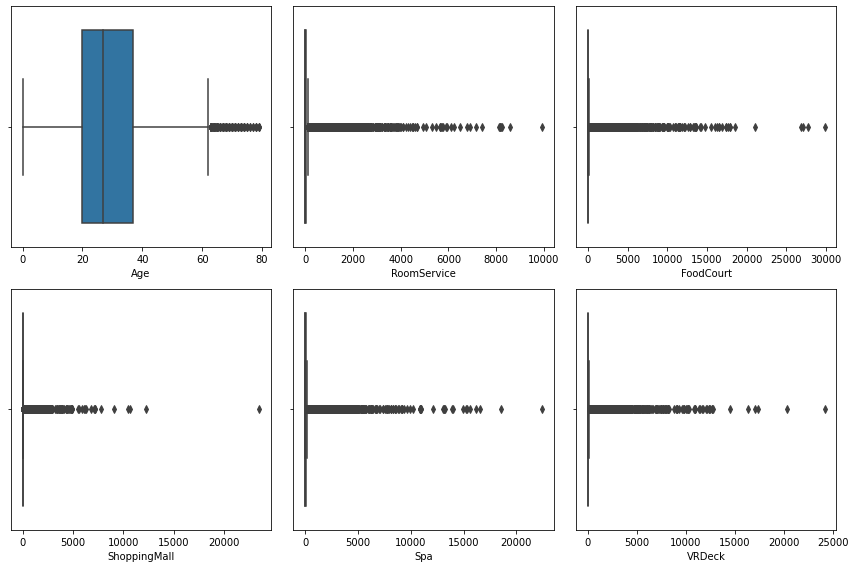

In [145]:
# Plotar os Boxplotes para as colunas numéricas
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

sns.boxplot(base_treino_clean['Age'], ax=ax[0,0])
sns.boxplot(base_treino_clean['RoomService'], ax=ax[0,1])
sns.boxplot(base_treino_clean['FoodCourt'], ax=ax[0,2])
sns.boxplot(base_treino_clean['ShoppingMall'], ax=ax[1,0])
sns.boxplot(base_treino_clean['Spa'], ax=ax[1,1])
sns.boxplot(base_treino_clean['VRDeck'], ax=ax[1,2])

plt.tight_layout();
# fig.savefig('boxplots')

Os Boxplots confirmam a ocorrência de outliers e com eles podemos ver que estes valores estão bem discrepantes, onde nem é possível visualizar os boxplots das outras colunas, apenas da coluna `Age`.

Como já definimos as funções para identificar os limites superiores e inferiores das entradas, vamos obter a quantidade de entradas consideradas outliers pelo método IQR:

In [146]:
# Criando uma função para exibir os limites de cada coluna
def iqr(x):
  # Calculando o IQR Score
  q1 = x.quantile(.25) # Primeiro Quartil(25%)
  q3 = x.quantile(.75) # Terceiro Quartil(75%)
  IQR_Score = q3 - q1

  # Definindo os limites superior e inferior
  superior = q3 + 1.5 * IQR_Score
  inferior = q1 - 1.5 * IQR_Score

  print("O IQR Score da coluna {} é {}".format(x.name,IQR_Score))
  print("O limite superior é de {}.".format(superior))
  print("O limite inferior é de {}.".format(inferior))
  return

In [147]:
# Criando uma lista com as colunas que serão analisadas
lista_colunas_iqr = [base_treino_clean.Age,
                     base_treino_clean.RoomService,
                     base_treino_clean.FoodCourt,
                     base_treino_clean.ShoppingMall,
                     base_treino_clean.Spa,
                     base_treino_clean.VRDeck]
# Criando um loop para executar a função iqr para cada variável na lista
for i in lista_colunas_iqr:
  iqr(i)
  print('') # espaçamento de linha entre cada chamada da função

O IQR Score da coluna Age é 17.0
O limite superior é de 62.5.
O limite inferior é de -5.5.

O IQR Score da coluna RoomService é 42.0
O limite superior é de 105.0.
O limite inferior é de -63.0.

O IQR Score da coluna FoodCourt é 62.0
O limite superior é de 155.0.
O limite inferior é de -93.0.

O IQR Score da coluna ShoppingMall é 23.0
O limite superior é de 57.5.
O limite inferior é de -34.5.

O IQR Score da coluna Spa é 53.25
O limite superior é de 133.125.
O limite inferior é de -79.875.

O IQR Score da coluna VRDeck é 40.0
O limite superior é de 100.0.
O limite inferior é de -60.0.



Como não temos valores abaixo de zero no resumo estatístico, vamos analisar somente as entradas com o foco no limite superior.

Para termos uma melhor visualização da quantidade de entradas com outliers detectadas, vamos criar um DataFrame para guardá-las:

In [148]:
# Obtendo a quantidade de entradas com outliers detectadas
qtd_outlier_Age = base_treino_clean.loc[base_treino_clean['Age'] > 62].shape[0]
qtd_outlier_RoomService = base_treino_clean.loc[base_treino_clean['RoomService'] > 105].shape[0]
qtd_outlier_FoodCourt = base_treino_clean.loc[base_treino_clean['FoodCourt'] > 155].shape[0]
qtd_outlier_ShoppingMall = base_treino_clean.loc[base_treino_clean['ShoppingMall'] > 57].shape[0]
qtd_outlier_Spa = base_treino_clean.loc[base_treino_clean['Spa'] > 133].shape[0]
qtd_outlier_VRDeck = base_treino_clean.loc[base_treino_clean['VRDeck'] > 100].shape[0]

# Obtendo a proporção das entradas detectadas
pp_outlier_Age = qtd_outlier_Age/base_treino_clean.shape[0]*100
pp_outlier_RoomService = qtd_outlier_RoomService/base_treino_clean.shape[0]*100
pp_outlier_FoodCourt = qtd_outlier_FoodCourt/base_treino_clean.shape[0]*100
pp_outlier_ShoppingMall = qtd_outlier_ShoppingMall/base_treino_clean.shape[0]*100
pp_outlier_Spa = qtd_outlier_Spa/base_treino_clean.shape[0]*100
pp_outlier_VRDeck = qtd_outlier_VRDeck/base_treino_clean.shape[0]*100

# Criando um DataFrame para a quantidade de outliers detectadas dentro de cada coluna numérica
df_outliers = pd.DataFrame({'Colunas':['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'],
                            'Outliers Detectadas':[qtd_outlier_Age,qtd_outlier_RoomService,qtd_outlier_FoodCourt,qtd_outlier_ShoppingMall,qtd_outlier_Spa,qtd_outlier_VRDeck],
                            'Proporção (%)':[pp_outlier_Age,pp_outlier_RoomService,pp_outlier_FoodCourt,pp_outlier_ShoppingMall,pp_outlier_Spa,pp_outlier_VRDeck]})

# Exibindo o DataFrame criado
df_outliers

<IPython.core.display.Javascript object>

,Colunas,Outliers Detectadas,Proporção (%)
0,Age,156,1.837889
1,RoomService,1853,21.830820
2,FoodCourt,1871,22.042884
3,ShoppingMall,1837,21.642319
4,Spa,1789,21.076814
5,VRDeck,1808,21.300660


Temos colunas com 22% de seus dados identificados como outliers e agora que sabemos essa proporção, podemos escolher um método de tratamento para elas, que são:

* Remoção: assim como no caso dos valores nulos, essas entradas identificadas como outliers podem estar distribuídas o que torna a proporção delas bem maior quando se olha toda a base, então termos colunas com 21% de outliers não significa que nossa base possui essa mesma proporção, podendo alcançar uma proporção de mais de 50%, ou seja, esta abordagem de remoção não nem um pouco viável;

* Imputação: substituindo as outliers por outros valores;

* Transformação: escalando, normalizando, fazendo transformações logarítmicas, entre outras;

* Agrupamento (Clustering): utilizando aprendizado não supervisionado para identificar padrões nas outliers e substituí-las para melhor se adequar à realidade do dataset;

* Tratar separadamente: criando dois modelos de Machine Learning (Aprendizado de Máquina) para lidar com dataset diferentes, um para os dados "normais" e o outro para os valores discrepântes; e

* Utilizar algoritmos de Machine Learning que não sejam sensíveis à outliers.

Como é bastante comum normalizarmos ou padronizarmos os dados para a modelagem de algoritmos de Machine Learning, vamos adotar este como a abordagem inicial para tratar as outliers, que nesse caso, se enquadra na abordagem de Transformação. Dessa forma iremos ver esse tratamento na Seção de modelagem da solução que iremos desenvolver mais a frente.

## Identificando as Bases Geradas com os Tratamentos

Como realizamos uma série de tratamentos, é interessante identificarmos cada base que foi gerada com esses tratamentos, para que possam ser utilizadas para testes durante a modelagem da solução.

Estes testes são importantes para avaliarmos se os tratamentos realizados foram benéficos para o desempenho das previsões realizadas pelos modelos de Machine Learning.

As bases geradas foram: (em ordem do mais simples para o mais complexo)

* Base de Treino:

  * `base_treino`: base original sem nenhum tratamento;

  * `base_treino_tratado`: base tratada, porém ainda com valores nulos nas colunas `Deck`, `NumCabin` e `Side`;

  * `base_treino_clean`: base tratada sem valores nulos;

* Base de Teste:
  
  * `base_teste`: base original sem nenhum tratamento;

  * `base_teste_tratado`: base tratada, porém ainda com valores nulos nas colunas `Deck`, `NumCabin` e `Side`;

  * `base_teste_clean`: base tratada sem valores nulos;


In [149]:
# Salvando as Bases de Treino em um arquivo CSV
#base_treino.to_csv('base_treino_original.csv', index=False) # base de treino original
#base_treino_tratado.to_csv('base_treino_tratado.csv', index=False) # base de treino tratada, porém com valores nulos nas colunas: Deck, NumCabin, Side
#base_treino_clean.to_csv('base_treino_limpo.csv', index=False) # base de treino tratada, mas sem nenhum valor nulo

# Salvando as Bases de Teste em um arquivo CSV
#base_teste.to_csv('base_teste_original.csv', index=False) # base de teste original
#base_teste_tratado.to_csv('base_teste_tratado.csv', index=False) # base de teste tratada, porém com valores nulos nas colunas: Deck, NumCabin, Side
#base_teste_clean.to_csv('base_teste_limpo.csv', index=False) # base de teste tratada, mas sem nenhum valor nulo

## Recomendando as Melhorias de Tratamentos

Durante a etapa de tratamento dos dados nulos vimos que algumas colunas precisariam de uma análise bem mais profunda para que suas entradas nulas fossem removidas, dessa forma poderíamos, por exemplo: transferir os passageiros que não possuem cabines para as que estão vazias.

Também não tratamos previamente as outliers, deixando para a etapa de modelagem que já iria de alguma forma tratar os dados através da normalização ou da padronização, mas poderíamos optar por duas outras abordagens devido a alta proporção de dados identificados como outliers:

* Imputação: substituir os valores identificados como outliers por valores que se aproximam da "realidade" dos dados;

* Tratar Separadamente: separar a base de dados em duas partes, uma para os dados não considerados outliers e outro para os que são tratados como outliers.



# Análise Exploratoria dos Dados

Nesta seção iremos explorar os dados em busca de informações sobre o problema.

Uma análise exploratória é bastante importante para extrairmos informações relevantes que nos ajudem a buscar uma solução para o problema, como encontrar padrões entre as pessoas que foram teletransportadas para que possamos prever quem será teletransportado.

Iremos analisar as colunas presentes na base de dados que passaram pelos tratamentos visando encontrar relações entre elas e a coluna alvo que informa quem foi teletransportado e quem não foi.

Inicialmente vamos conhecer a proporção total dos passageiros teletransportados da espaçonave:

In [150]:
# Proporção da coluna alvo
pp_transported = (base_treino_clean['Transported'].loc[base_treino_clean['Transported'] == 1].shape[0])/(base_treino_clean['Transported'].shape[0])

# Exibindo a proporção dos passageiros que foram teletransportados
print('{:.2f}% dos passageiros da Espaçonave Titanic foram teletransportados.'.format(pp_transported*100))

50.34% dos passageiros da Espaçonave Titanic foram teletransportados.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

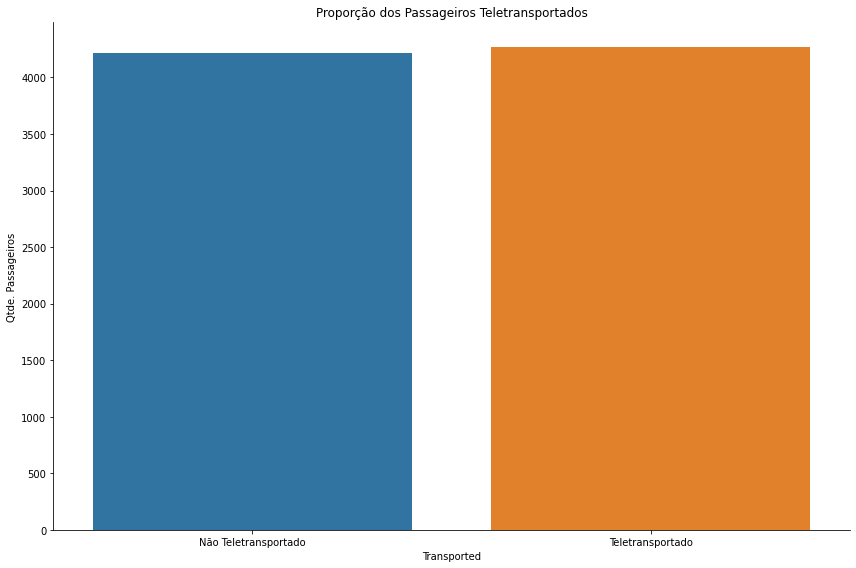

In [151]:
# Proporção da coluna alvo em gráfico
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot('Transported', data=base_treino_clean, ax=ax)
ax.set_title("Proporção dos Passageiros Teletransportados")
plt.xticks([0,1],['Não Teletransportado','Teletransportado'])
ax.set_ylabel("Qtde. Passageiros")
sns.despine()

plt.tight_layout()

Vemos que metade dos passageiros da Espaçonave foram teletransportados, o que também mostra que nossa base está bastante balanceada, ou seja, não há a necessidade de gerar dados sintéticos para simular uma classe desbalanceada.

Agora que sabemos a proporção dos passageiros teletransportados, vamos observar se a idade é um fator impactante para uma previsão:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

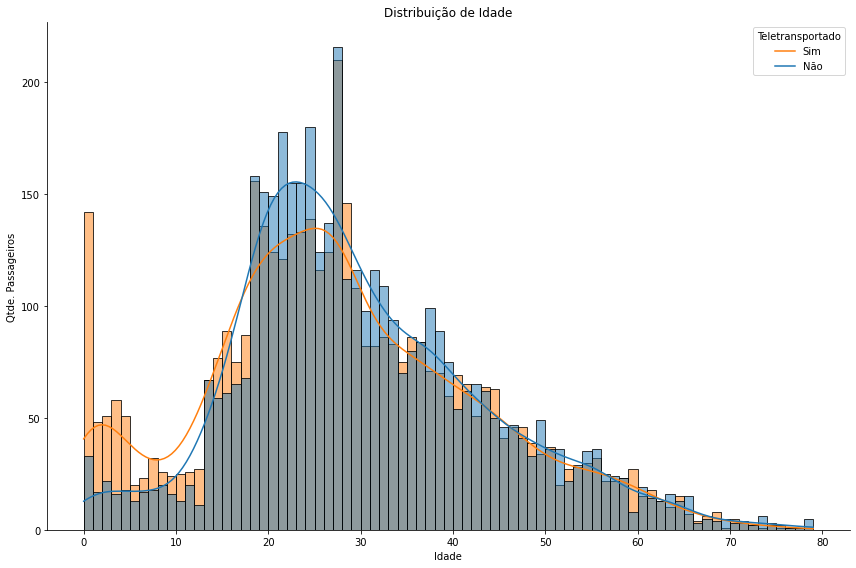

In [152]:
# Distribuição da coluna alvo em relação à Idade
fig, ax = plt.subplots(figsize=(12,8))

sns.histplot(data=base_treino_clean, x='Age', hue='Transported', binwidth=1, kde=True)
plt.legend(title='Teletransportado', loc='upper right', labels=['Sim', 'Não'])
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Qtde. Passageiros')
sns.despine()

plt.tight_layout()

Podemos perceber que passageiros entre as idades 0 à 18 anos possuem uma chance maior de serem teletransportadas do que não, enquanto que entre as idades 18 à 40, as chances de não serem teletransportadas são maiores que de serem, e por fim, passageiros com idades acima de 40 anos possuem relativamente a mesma chance de serem teletransportadas ou não.

Vamos realizar a mesma análise para os serviços oferecidos na Espaçonave:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

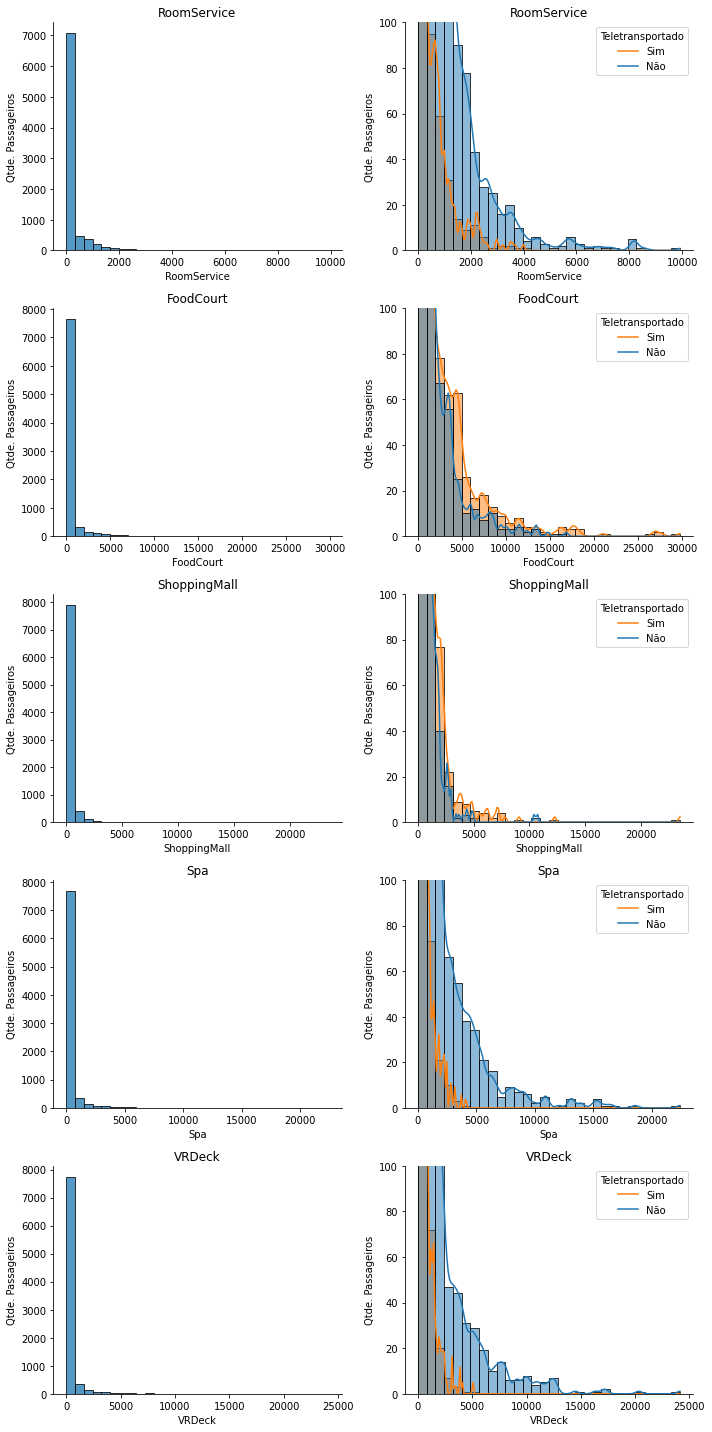

In [153]:
# Criando uma lista para as colunas referentes aos serviços
lista_servicos=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

# Plotando os histogramas e os histogramas em relação à coluna alvo
fig = plt.figure(figsize=(10,20))
for i, col_nome in enumerate(lista_servicos):

    # Plot esquerdo
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=base_treino_clean, x=col_nome, axes=ax, bins=30, kde=False)
    plt.ylabel('Qtde. Passageiros')
    sns.despine()
    ax.set_title(col_nome)
    
    # Plote direito (truncado)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=base_treino_clean, x=col_nome, axes=ax, bins=30, kde=True, hue='Transported')
    plt.legend(title='Teletransportado', loc='upper right', labels=['Sim', 'Não'])
    plt.ylabel('Qtde. Passageiros')
    plt.ylim([0,100])
    sns.despine()
    ax.set_title(col_nome)

fig.tight_layout()

Com base nos gráficos, vemos que a grande maioria dos passageiros não contratam os serviços disponíveis na Espaçonave, agora olhando esses dados em relação aos passageiros que foram teletransportados, temos:

* `RoomService` (Serviço de Quarto): passageiros que contrataram o serviço de quarto possuem menos chances de serem teletransportados;

* `FoodCourt` (Praça de Alimentação): os passageiros que gastaram na praça de alimentação possuem mais chances de serem teletransportadas.

* `ShoppingMall`: os passageiros que realizaram compras no Shopping da Espaçonave possuem mais chances de serem teletransportadas, embora não sejam tão discrepantes.

* `Spa`: aqueles que usaram este serviço possuem menores chances de serem teletransportadas.

* `VRDeck`: apesar de não ser especificado qual tipo de serviço é este, podemos insinuar que é um serviço dentro de uma área privada (por Deck ser uma área coberta), quanto ao gráfico deste serviço, podemos ver que os passageiros que consumiram este serviço possuem menores chances de serem teletransportadas.

Podemos perceber um ponto bastante interessante com esses gráficos dos serviços, os serviços que aparentemente são realizados dentro de uma área coberta possuem bem menos chances de seus clientes serem teletransportados, e aqueles que estão na área aberta como `FoodCourt` e `ShoppingMall` possuem uma chance maior dos passageiros serem teletransportados, embora não seja uma diferença tão discrepante entre ser ou não ser teletransportado nestes dois serviços, diferentemente do caso dos serviços em área coberta.

Como temos colunas categóricas, vamos também realizar esta mesma análise acima para as colunas: `HomePlanet`, `CryoSleep`, `Destination` e `Vip`.

Antes de analisarmos a relação entre os passageiros teletransportados e estas colunas categóricas, vamos observar suas informações gerais.

Para a coluna `HomePlanet`:

In [154]:
# Obtendo a proporção de cada valor dentro da coluna HomePlanet
base_treino_clean['HomePlanet'].value_counts()/base_treino_clean.shape[0]*100

Earth     55.336946
Europa    24.387370
Mars      20.275683
Name: HomePlanet, dtype: float64

O maior número de embarques de passageiros ocorreu no planeta Terra (55.3%), seguido do planeta Europa (24.4%) e por fim Marte (20.3%).

Para `CryoSleep`:

In [155]:
# Obtendo a proporção de cada valor dentro da coluna CryoSleep
base_treino_clean['CryoSleep'].value_counts()/base_treino_clean.shape[0]*100

0.0    64.125825
1.0    35.874175
Name: CryoSleep, dtype: float64

Com esta coluna vemos que quase 36% dos passageiros da Espaçonave estão em sono criogênico.

Vamos observar a proporção de passageiros para cada destino da Espaçonave:

In [156]:
# Obtendo a proporção de cada valor dentro da coluna Destination
base_treino_clean['Destination'].value_counts()/base_treino_clean.shape[0]*100

TRAPPIST-1e      70.252121
55 Cancri e      20.605561
PSO J318.5-22     9.142319
Name: Destination, dtype: float64

Com base nesta coluna, temos que:

* 70% dos passageiros embarcaram com destino à *TRAPPIST-1e*; 

* 21% com destino à *55 Cancri e*, e 

* 9% para *PSO J318.5-22*.

Agora quanto ao serviço VIP prestado: 

In [157]:
# Obtendo a proporção de cada valor dentro da coluna VIP
base_treino_clean['VIP'].value_counts()/base_treino_clean.shape[0]*100

0.0    97.278511
1.0     2.721489
Name: VIP, dtype: float64

Aproximadamente 3% dos passageiros optaram pelos serviços VIP ofertado na Espaçonave.

Agora analisando estas colunas em relação às chances dos passageiros serem teletransportados, obtemos os seguintes gráficos:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

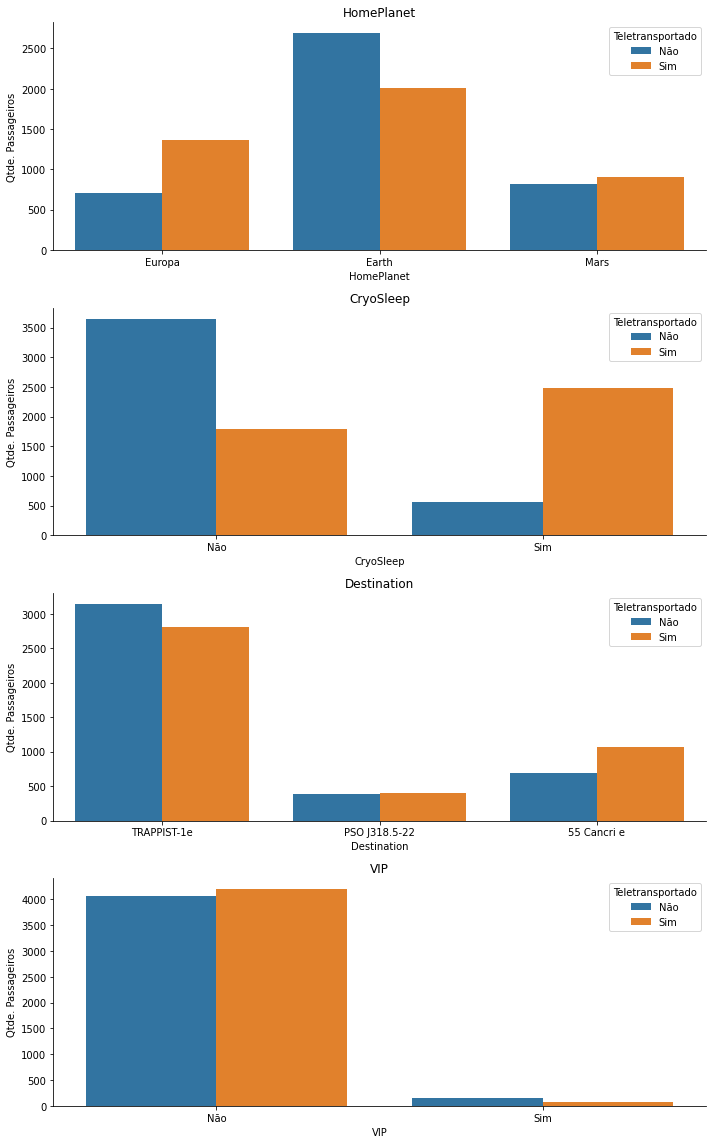

In [158]:
# Criando uma lista com as colunas categóricas
lista_categorias = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plotando os gráficos em relação à coluna alvo
fig=plt.figure(figsize=(10,16))
for i, col_nome in enumerate(lista_categorias):
    
    if (col_nome == 'CryoSleep') | (col_nome == 'VIP'):
      ax=fig.add_subplot(4,1,i+1)
      sns.countplot(data=base_treino_clean, x=col_nome, axes=ax, hue='Transported')
      plt.xticks([0,1],['Não','Sim'])
      plt.legend(title='Teletransportado', loc='upper right', labels=['Não', 'Sim'])
      plt.ylabel('Qtde. Passageiros')
      sns.despine()
      ax.set_title(col_nome)
    
    else:
      ax=fig.add_subplot(4,1,i+1)
      sns.countplot(data=base_treino_clean, x=col_nome, axes=ax, hue='Transported')
      plt.legend(title='Teletransportado', loc='upper right', labels=['Não', 'Sim'])
      plt.ylabel('Qtde. Passageiros')
      sns.despine()
      ax.set_title(col_nome)
      
fig.tight_layout()

Interpretando os gráficos acima, vemos que há Insights interessantes em relação às chances dos passageiros serem teletransportados, que são: 

* `HomePlanet`: passageiros que embarcaram no planeta:

 * Europa: possuem bem mais chances de serem teletransportados;
 
 * Terra: possuem bem menos chances de serem teletransportados;

 * Marte: possuem mais chances de serem teletransportados, embora não seja uma diferença muito grande.

* `CryoSleep`: os passageiros que optaram pelo sono criogênico possuem grandes chances de serem teletransportados, enquanto que para os que não estão ocorre o inverso, onde possuem menores chances de serem teletransportados.

* `Destination`: aqueles passageiros com destino para:

 * `TRAPPIST-1e`: possuem menos chances de serem teletransportados, embora não seja uma diferença muito grande; 

 * `PSO J318.5-22`: possuem praticamente a mesma chance de ser ou não ser teletransportados;

 * `55 Cancri e`: possuem mais chances de serem teletransportados.

* `VIP`: para aqueles não que optaram pelos serviços VIP, as chances de serem teletransportados são um pouco maiores, enquanto que para aqueles que optaram pelo serviço, as chances são menores.

Na análise anterior (para os serviços) identificamos que aqueles que estavam mais tempo em uma área coberta tinha menos chances de serem teletransportadas, e nesta análise acima podemos ver algo também interessante. Os passageiros que estão em sono criogênico possuem altas chances de serem teletransportadas, o que insinua que a área onde estas pessoas estão dormindo estão em uma região que foi mais afetada pela anomalia.

Essa informação acima pode ser bastante benéfica caso tenhamos um mapa da Espaçonave, onde poderíamos demarcar uma região ao redor do setor de criogenia para que possamos identificar uma possível área de impactos mais severos.

Temos mais duas colunas interessantes que podem passar pela mesma análise em relação às chances dos passageiros serem teletransportados, que são: `PassengerNumbInGroup`, `Deck` e `Side`.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

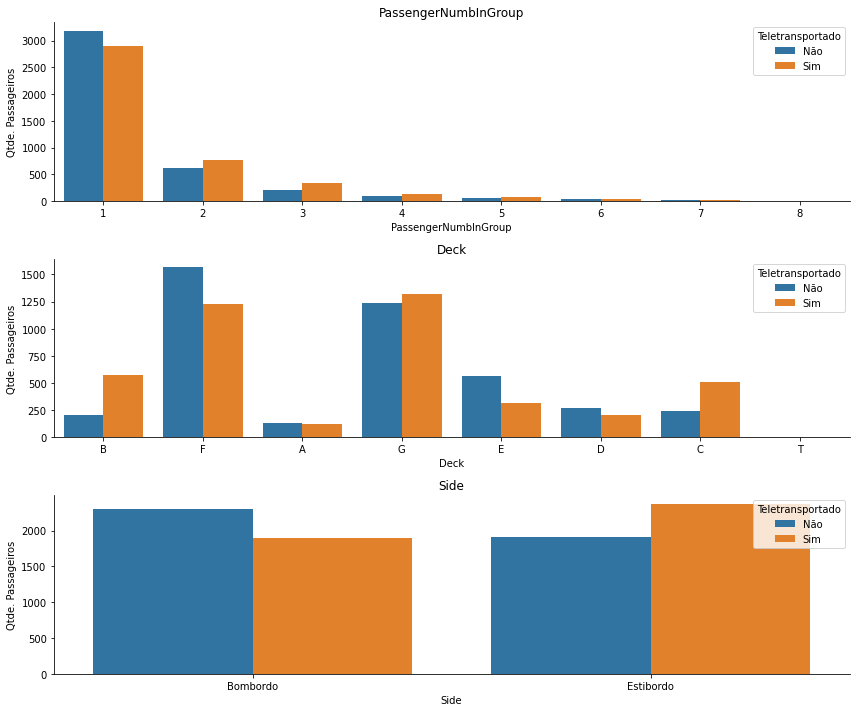

In [159]:
# Criando uma lista com as colunas Deck e Side
lista_extras = ['PassengerNumbInGroup', 'Deck', 'Side']

# Plotando os gráficos em relação à coluna alvo
fig = plt.figure(figsize=(12,10))
for i, col_nome in enumerate(lista_extras):

  if (col_nome == 'Side'):
      ax=fig.add_subplot(3,1,i+1)
      sns.countplot(data=base_treino_clean, x=col_nome, axes=ax, hue='Transported')
      plt.xticks([0,1],['Bombordo','Estibordo'])
      plt.legend(title='Teletransportado', loc='upper right', labels=['Não', 'Sim'])
      plt.ylabel('Qtde. Passageiros')
      sns.despine()
      ax.set_title(col_nome)

  else:
      ax = fig.add_subplot(3,1,i+1)
      sns.countplot(data=base_treino_clean, x=col_nome, axes=ax, hue='Transported')
      plt.legend(title='Teletransportado', loc='upper right', labels=['Não', 'Sim'])
      plt.ylabel('Qtde. Passageiros')
      sns.despine()
      ax.set_title(col_nome)

fig.tight_layout()

Com os gráficos acima podemos observar que a grande maioria dos passageiros estão viajando sozinhos, e em relação às chances de serem teletransportados:

* Aqueles que estão viajando sozinhos possuem menos chances de serem teletransportados, embora seja uma diferença pequena;

* Para os que estão viajando em pares ou até em seis pessoas chances são um pouco maiores de serem teletransportadas;

* Para aqueles que estão viajando em grupos de sete e oite pessoas, as chances de serem teletransportados são menores, embora seja uma difirença bem pequena.



Já observado os Decks, os F e G são os que mais possuem passageiros hospedados, enquanto o Deck T não possui quase nenhum, e em relação às chances de serem teletransportados, os passageiros que estão hospedados em:

* Deck B: possuem bem mais chances de serem teletransportadao;

* Deck F: possuem menos chances de serem teletransportados;

* Deck A: possuem relativamente as mesmas chances entre serem ou não serem teletransportados; 

* Deck G: possuem mais chances de serem teletransportados, embora seja uma diferença pequena; 

* Deck E: possuem menos chances de serem teletransportados;

* Deck D: possuem menos chances de serem teletransportados; embora seja uma diferença pequena;

* Deck C: possuem bem mais chances de serem teletransportados;

* Deck T: devido ao pequeno número de passageiros hospedados neste Deck em relação aos outros, não é possível identificar visualmente, mas as chances dos passageiros hospedados neste Deck serem teletransportados são menores.

Agora com a coluna `Side`, temos uma distribuição balanceada entre as cabines tanto a Bombordo quanto à Estibordo, e quanto à relação entre os passageiros teletransportados, temos que para as cabines localizadas à:

* Bombordo: as chances dos passageiros serem teletransportados são menores;

* Estibordo: ocorre o contrário, onde as chances de serem teletransportados são maiores.

## Sugestões de Feature Engineering

* Criar uma nova coluna segmentando as idades dos passageiros, uma vez que pessoas entre certas idades possuem mais chances de serem teletransportadas que em outras idades;

* Criar uma coluna para identificar quem gastou dinheiro com algum serviço dentro da Espaçonave e também para os que não gastaram nada com estes serviços;

# Conclusão da Análise Exploratória

Com essa exploratória podemos identificar informações interessantes como conhecer os passageiros da Espaçonave, onde estão, se estão em grupos, onde estão hospedados e também quais as chances de um passageiro novo ser teletransportado com base nos dados obtidos.

As etapas de tratamentos e de Feature Engineering ainda podem fornecer mais informações para uma exploratória, uma vez que alteram a estrutura dos dados e geram novas informações com as variáveis desenvolvidas. Nesse caso foram disponibilizadas seções de recomendações e sugestões para estas duas etapas durante o desenvolvimento deste notebook, para que possa se obter uma exploratória ainda mais detalhada do problema.

# Preparação para a Modelagem

Nesta etapa vamos aplicar as sugestões de Feature Engineering apresentadas no fim da análise exploratória, preparar os dados para alimentarem os modelos, e também analisar a relação entre as colunas. 

Antes de aplicarmos as sugestões de Feature Engeneering, vamos criar uma nova base de dados para esta etapa:

In [160]:
# Copiando as bases de dados obtidas pelos tratamentos de dados para a etapa de preparação para a modelagem
base_treino_prep = base_treino_clean.copy()
base_teste_prep = base_teste_clean.copy()

## Feature Engeneering

A primeira sugestão foi para segmentar a coluna `Age` em faixas etárias, voltando na análise exploratória, tivemos, de forma geral, os seguintes Insights referentes a esta coluna:

* 0 - 18: Possuem mais chances de serem teletransportados;

* 19 - 45: Possuem menos chances de serem teletransportados;

* 46+: Possuem praticamente a mesma chance de ser ou não teletransportado.

A segmentação será feita em uma nova coluna que será criada com o nome `Faixa_Etaria`, onde a faixa de: 0 a 18 é o grupo A, 19 a 45 é o grupo B, e aqueles com mais de 45 anos estão no grupo C.



In [161]:
# Definindo os critérios em uma função
def faixa_etaria(row):
   if row['Age'] <= 18 : # faixa de 0-18
      return 'A'
   if (row['Age'] > 18) & (row['Age'] <= 45): # faixa 19-45
      return 'B'
   if row['Age'] > 45 : # faixa 46+
      return 'C'

In [162]:
# Criando uma nova coluna na bases, aplicando os critérios da segmentação das faixas etárias
base_treino_prep['Faixa_Etaria'] = base_treino_prep.apply (lambda row: faixa_etaria(row), axis=1)
base_teste_prep['Faixa_Etaria'] = base_teste_prep.apply (lambda row: faixa_etaria(row), axis=1)

In [163]:
# Checando a base de treino para confirmar a criação da nova coluna
base_treino_prep.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,PassengerNumbInGroup,Deck,NumCabin,Side,Faixa_Etaria
0,0001_01,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,1,1,B,0.0,0.0,B
1,0002_01,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,2,1,F,0.0,1.0,B
2,0003_01,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,3,1,A,0.0,1.0,C
3,0003_02,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,3,2,A,0.0,1.0,B
4,0004_01,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,4,1,F,1.0,1.0,A


Agora que segmentamos as faixas etárias, vamos seguir para a segunda sugestão, que era criar uma nova coluna identificando quem consumiu ou não os serviços prestados pela Espaçonave.

Para isso, também vamos criar uma função com os critérios para gerar a nova coluna:

In [164]:
# Definindo uma função com os critérios
def consumo_servicos(row):
  if (row['RoomService'] > 0) | (row['FoodCourt'] > 0) | (row['ShoppingMall'] > 0) | (row['Spa'] > 0) | (row['VRDeck'] > 0):
    return 1
  if (row['RoomService'] == 0) & (row['FoodCourt'] == 0) & (row['ShoppingMall'] == 0) & (row['Spa'] == 0) & (row['VRDeck'] == 0):
    return 0

In [165]:
# Criando uma nova coluna nas bases para identificar quem consumiu algum tipo de serviço da espaçonave
base_treino_prep['Consumo_Servicos'] = base_treino_prep.apply (lambda row: consumo_servicos(row), axis=1)
base_teste_prep['Consumo_Servicos'] = base_teste_prep.apply (lambda row: consumo_servicos(row), axis=1)

In [166]:
# Checando a base de treino para confirmar a criação da nova coluna
base_treino_prep.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,PassengerNumbInGroup,Deck,NumCabin,Side,Faixa_Etaria,Consumo_Servicos
0,0001_01,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,1,1,B,0.0,0.0,B,0
1,0002_01,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,2,1,F,0.0,1.0,B,1
2,0003_01,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,3,1,A,0.0,1.0,C,1
3,0003_02,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,3,2,A,0.0,1.0,B,1
4,0004_01,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,4,1,F,1.0,1.0,A,1


Agora que realizamos os processos de Feature Engineering que haviam sido sugeridas na etapa de exploratória, vamos avançar para a preparação dos dados para alimentarem os modelos preditivos.

## Transformação das Colunas Categóricas

Como esses modelos não conseguem lidar com dados categóricos que estão em `string`, temos que realizar as codificações necessárias.

As colunas categóricas que temos são: `HomePlanet, Destination, Deck e Faixa_Etaria`.

In [167]:
# Separando estas colunas categóricas para aplicarmos a codificação Get Dummies
lista_colunas_categoricas = ['HomePlanet', 'Destination', 'Deck', 'Faixa_Etaria']

# Aplicando a codificação Get Dummies nas colunas categóricas
base_treino_prep = pd.get_dummies(base_treino_prep, columns=lista_colunas_categoricas)
base_teste_prep = pd.get_dummies(base_teste_prep, columns=lista_colunas_categoricas)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [168]:
# Checando a base de treino para confirmar as transformações com o método de codificação Get Dummies
base_treino_prep.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Faixa_Etaria_A,Faixa_Etaria_B,Faixa_Etaria_C
0,0001_01,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,...,1,0,0,0,0,0,0,0,1,0
1,0002_01,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,...,0,0,0,0,1,0,0,0,1,0
2,0003_01,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,...,0,0,0,0,0,0,0,0,0,1
3,0003_02,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,...,0,0,0,0,0,0,0,0,1,0
4,0004_01,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,...,0,0,0,0,1,0,0,1,0,0


Nestas bases, existem algumas informações irrelevantes para as previsões que serão realizadas pelos modelos de Machine Learning, que são: `PassengerId` e `Name`, que são apenas dados de identificação do passageiro, e portanto vamos removê-las para reduzir a dimensionalidade dos dados para o modelo.

Para que possamos recuperar essas informações após as previsões, vamos criar uma base de dados final para ambas as bases que temos, e então remover estas colunas irrelevantes para os modelos:

In [169]:
# Copiando as bases da preparação dos dados
base_treino_final = base_treino_prep.copy()
base_teste_final = base_teste_prep.copy()

In [170]:
# Removendo as colunas PassengerId e Name das bases
base_treino_final.drop(['PassengerId', 'Name'], axis=1, inplace=True)
base_teste_final.drop(['PassengerId', 'Name'], axis=1, inplace=True)

In [171]:
# Checando as primeiras entradas da base de treinamento
base_treino_final.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerGroup,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Faixa_Etaria_A,Faixa_Etaria_B,Faixa_Etaria_C
0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1,2,...,0,0,0,0,1,0,0,0,1,0
2,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0,3,...,0,0,0,0,0,0,0,0,0,1
3,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0,3,...,0,0,0,0,0,0,0,0,1,0
4,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1,4,...,0,0,0,0,1,0,0,1,0,0


# Modelagem da Solução

Nesta etapa iremos desenvolver e testar os modelos de Machine Learning para prever quais passageiros foram teletransportados pela Anomalia durante o impacto com a nuvem de poeira.

Vamos começar observando a correlação entre as colunas da base de treino:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

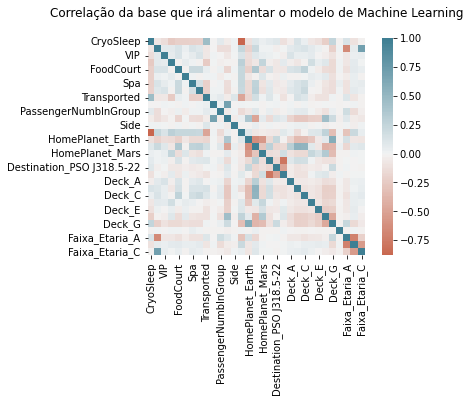

In [172]:
# Checando a correlação entre as variáveis do dataset que irá alimentar o modelo
corr_colunas = base_treino_final.corr()
ax = sns.heatmap(corr_colunas, 
                 center=0,
                 cmap=sns.diverging_palette(20, 220, n=200),
                 square=True)
ax.set_title('Correlação da base que irá alimentar o modelo de Machine Learning\n')

plt.show()

É possível ver de forma mais detalhada essa matriz de correlação:

In [173]:
# Obtendo a correlação das variáveis do dataset mais detalhadamente
correlacao = corr_colunas
correlacao.style.background_gradient(cmap='coolwarm')

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerGroup,PassengerNumbInGroup,NumCabin,Side,Consumo_Servicos,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Faixa_Etaria_A,Faixa_Etaria_B,Faixa_Etaria_C
CryoSleep,1.000000,-0.077325,-0.125103,-0.256154,-0.209590,-0.211886,-0.202654,-0.197063,0.466270,-0.004309,0.068597,-0.037592,0.019058,-0.881923,-0.111175,0.096330,0.034583,0.063499,0.089162,-0.112394,-0.029928,0.126377,0.032964,-0.069769,-0.111630,-0.226697,0.253514,-0.018159,0.120109,-0.093917,-0.013463
Age,-0.077325,1.000000,0.077771,0.070377,0.126785,0.033912,0.119126,0.099625,-0.075917,-0.006620,-0.130546,-0.130311,0.011315,0.228241,-0.197963,0.214972,0.015181,0.015229,-0.025006,0.002291,0.074815,0.104652,0.127916,0.077969,0.028564,-0.018498,-0.212687,0.013898,-0.647687,0.058630,0.701055
VIP,-0.125103,0.077771,1.000000,0.054779,0.122346,0.017042,0.058209,0.122983,-0.059794,0.012610,-0.004966,-0.075501,0.000556,0.122771,-0.127919,0.102292,0.048919,0.025781,0.004726,-0.025790,0.118682,0.037117,0.047718,0.065932,-0.002000,-0.035422,-0.092398,-0.004061,-0.066074,0.030492,0.037121
RoomService,-0.256154,0.070377,0.054779,1.000000,-0.017497,0.052221,0.012971,-0.019378,-0.245219,0.004106,-0.027736,-0.008434,-0.011660,0.290449,-0.141922,-0.075030,0.255625,-0.026457,-0.064372,0.063992,-0.023446,-0.066740,-0.019298,0.170257,0.047671,0.093586,-0.150796,0.008019,-0.079082,0.063361,0.006725
FoodCourt,-0.209590,0.126785,0.122346,-0.017497,1.000000,-0.012893,0.216768,0.220616,0.047661,-0.009599,0.022522,-0.181346,0.020051,0.237652,-0.214252,0.364519,-0.124404,0.136436,-0.064781,-0.079873,0.120351,0.156798,0.259933,0.020270,-0.039330,-0.133879,-0.151842,0.014383,-0.114663,0.069964,0.040492
ShoppingMall,-0.211886,0.033912,0.017042,0.052221,-0.012893,1.000000,0.016603,-0.007772,0.011204,0.018352,-0.040548,0.001965,-0.019901,0.240254,-0.072462,-0.018082,0.108913,-0.011497,-0.030433,0.029358,-0.017716,-0.011330,0.000413,0.054756,0.031411,0.074166,-0.110474,-0.006861,-0.043950,0.043608,-0.008044
Spa,-0.202654,0.119126,0.058209,0.012971,0.216768,0.016603,1.000000,0.149590,-0.217627,-0.003508,0.018978,-0.130010,0.001883,0.229787,-0.156809,0.263242,-0.087263,0.075877,-0.054557,-0.032738,0.062528,0.118801,0.169607,0.035388,-0.010759,-0.087680,-0.125664,0.037418,-0.096302,0.043822,0.054973
VRDeck,-0.197063,0.099625,0.122983,-0.019378,0.220616,-0.007772,0.149590,1.000000,-0.205456,0.014498,0.009895,-0.137518,-0.008198,0.223446,-0.154363,0.284193,-0.112663,0.091991,-0.046395,-0.052140,0.096842,0.123476,0.208316,-0.003887,-0.018521,-0.096717,-0.129845,0.012449,-0.099251,0.061905,0.033163
Transported,0.466270,-0.075917,-0.059794,-0.245219,0.047661,0.011204,-0.217627,-0.205456,1.000000,0.022408,0.066068,-0.045486,0.103617,-0.481195,-0.168994,0.176650,0.020290,0.107498,0.002738,-0.096837,-0.002583,0.146776,0.109745,-0.034378,-0.099134,-0.089543,0.016320,-0.014733,0.109054,-0.084900,-0.012747
PassengerGroup,-0.004309,-0.006620,0.012610,0.004106,-0.009599,0.018352,-0.003508,0.014498,0.022408,1.000000,0.008645,0.679685,-0.006733,0.010190,0.000623,0.007252,-0.008516,0.001231,0.008342,-0.006349,0.008011,-0.007588,0.011598,-0.009518,-0.001477,0.002571,-0.001381,-0.016308,-0.002344,0.010064,-0.011289


Podemos reparar que nossa base de dados possui uma alta variação, visto a pequena quantidade de cores fortes, e isso é algo benéfico para o modelo, já que correlações altas significam que as colunas possuem praticamente o mesmo tipo de informação para o modelo.

Interessante notar que a coluna `Faixa_Etaria_C` possui bastante correlação com a coluna `VIP`, mostrando que os passageiros que possuem mais de 46 anos contratam mais os serviços VIP, enquanto que a coluna `Faixa_Etaria_A` possui uma correlação muito baixa, mostrando que as crianças e jovens não possuem serviços VIP.

Agora que vimos que nossos dados possuem variabilidade suficiente para que o modelo possa realizar previsões, vamos avançar para o entendimento do problema.

## Entendendo o Problema

Entender o problema é fundamental para definirmos qual tipo de algoritmo de Machine Learning iremos utilizar e quais serão as métricas de avaliação mais relevantes.

Como foi apresentado no início do projeto, nossa missão é prever quais são os passageiros que foram teletransportados pela Anomalia, ou seja, temos um problema de classificação.

Para algoritmos de classificação, temos que conhecer os impactos que os falsos positivos e negativos causam.

* Falsos Positivos: um passageiro que não foi teletransportado seria apontado como se tivesse sido.

* Falsos Negativos: um passageiro que foi teletransportado pela Anomalia seria ignorado, pois o modelo diria que este não foi teletransportado.

Estamos lidando com vidas, então minimizar a perda é o mais importante para a nossa solução, ou seja, reduzir a taxa de falsos negativos é o mais importante.

É importante ter em mente que esses dois casos se comportam como uma balança, assim se reduzirmos a taxa de falsos negativos, vamos aumentar a taxa de falsos positivos. Uma alta taxa de falsos positivos aumentaria a carga dos trabalhos de busca da equipe de resgate, que perderiam tempo indo atrás de passageiros que já estão a salvo. Dessa forma seria importante balancear esses dois casos, para evitar sobrecarregar a equipe de resgate.

Em primeiro momento iremos nos focar na redução dos falsos negativos, então iremos utilizar a métrica `Recall` para avaliar o desempenho dos modelos.


## Desenvolvendo os Modelos

Para comparar resultados, iremos desenvolver os seguintes modelos:

* Logistic Regression;

* Decision Tree;

* Random Forest;

* Support Vector Machine;

* Naive Bayes; e

* XGBoost.

Como foi dito durante a análise de qualidade dos dados, mais especificamente na etapa de Outliers, é comum normalizarmos ou padronizarmos os dados, ainda mais quando existem escalas diferentes para cada coluna numérica. Além de trazer os dados numéricos de cada coluna para uma mesma escala, esse tratamento também reduz os impactos das Outliers, que sabemos que estão presentes, mas que comentamos que seriam tratadas nesta Seção.

Vamos instaciar os algoritmos que comentamos acima:

In [174]:
# Instanciando os modelos
lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()
gnb = GaussianNB() 
xgb = XGBClassifier()

Agora que temos os modelos instanciados, vamos criar duas pipelines para avaliar os modelos treinados, uma para os dados padronizados e outra para os normalizados:

In [175]:
# Validação Cruzada com base na métrica Recall - Padronizado
def val_model_padronizado(X, y, clf):
  X = np.array(X) 
  y = np.array(y) 

  pipeline_pd = make_pipeline(StandardScaler(), clf)
  scores_pd = cross_val_score(pipeline_pd, X, y, scoring='recall') # por padrão se usa 5 Stratified KFolds
  return scores_pd.mean()

# Validação Cruzada com base na métrica Recall - Normalizado
def val_model_normalizado(X, y, clf):
  X = np.array(X)
  y = np.array(y)

  pipeline_nm = make_pipeline(MinMaxScaler(), clf)
  scores_nm = cross_val_score(pipeline_nm, X, y, scoring='recall') # por padrão se usa 5 Stratified KFolds
  return scores_nm.mean()

Agora que temos as duas funções preparadas, vamos separar os dados da base de treino entre treino e teste, ou seja, dessa base de treino, iremos segmentar uma parte para ser usada como dados de teste para validar os modelos:

In [176]:
# Separando os dados da base de treino
X = base_treino_final.drop('Transported', axis=1)
y = base_treino_final['Transported'] # variável alvo

# Dividindo entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

<IPython.core.display.Javascript object>

Tendo todas as preparações realizadas, podemos então testar os modelos com os dados de treino:

In [177]:
# DataFrame com avaliação dos modelos - Padronizados
modelo_pd = []
recall_pd = []
tempo_pd = []

# Avaliando o desempenho dos modelos - Padronizados
for clf in (lr, dt, rf, svc, gnb, xgb):
  start = time.process_time()
  modelo_pd.append(clf.__class__.__name__)
  recall_pd.append(val_model_padronizado(X_train, y_train, clf))
  tempo_pd.append(time.process_time() - start)

# DataFrame da avaliação dos modelos - Padronizados 
df_val_pd = pd.DataFrame({'Modelos': modelo_pd,
                          'Recall_Padronizado': recall_pd,
                          'Tempo_Padronizado': tempo_pd})

df_val_pd = df_val_pd.set_index('Modelos') # tornando a coluna 'Modelos' no índex do DataFrame

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Iremos realizar o mesmo procedimento agora para a Normalização:

In [178]:
# DataFrame com avaliação dos modelos - Normalizados
modelo_nm = []
recall_nm = []
tempo_nm = []

# Avaliando o desempenho dos modelos - Normalizados
for clf in (lr, dt, rf, svc, gnb, xgb):
  start = time.process_time()
  modelo_nm.append(clf.__class__.__name__)
  recall_nm.append(val_model_normalizado(X_train, y_train, clf))
  tempo_nm.append(time.process_time() - start)

# DataFrame da avaliação dos modelos - Normalizados 
df_val_nm = pd.DataFrame({'Modelos': modelo_nm,
                          'Recall_Normalizado': recall_nm,
                          'Tempo_Normalizado': tempo_nm})

df_val_nm = df_val_nm.set_index('Modelos') # tornando a coluna 'Modelos' no índex do DataFrame

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Para facilitar na visualização dos resultados, vamos unir os DataFrames gerados:

In [179]:
# Unindo os DataFrames
df_val = df_val_pd.join(df_val_nm[['Recall_Normalizado','Tempo_Normalizado']])

# Checando o DataFrame
df_val

,Recall_Padronizado,Tempo_Padronizado,Recall_Normalizado,Tempo_Normalizado
Modelos,,,,
LogisticRegression,0.816952,0.587944,0.745970,1.764529
DecisionTreeClassifier,0.744501,0.361055,0.750073,0.368616
RandomForestClassifier,0.755352,3.897182,0.756817,3.841500
SVC,0.794952,9.342546,0.700497,10.098443
GaussianNB,0.890311,0.071505,0.889137,0.062998
XGBClassifier,0.824879,2.679663,0.824879,2.619213


Podemos ver que os modelos que foram testados com os dados Padronizados tiveram resultados melhores que os Normalizados, embora em alguns modelos essa diferença não tenha sido tão grande.

Também é interessante notar o tempo de execução dos modelos, onde tivemos tempos bem altos em relação a outros modelos.

Olhando então o lado esquerdo do DataFrame (modelos Padronizados), vemos que os três melhores modelos foram:

* GaussianNB (Naive Bayes): com `Recall` = 89% e tempo de execução de 0.07 segundos;

* XGBoost: com `Recall` = 82% e tempo de execução de 2.67 segundos;

* Logistic Regression: com `Recall` = 81% e tempo de execução de 0.58 segundos.

Como os modelos tiveram melhores desempenhos com os dados padronizados, vamos aplicar a transformação nos dados agora de forma definitiva, pois essa transformação não era salvo durante a validação do modelo:

In [180]:
# Aplicando a Padronização nos dados
std = StandardScaler().fit(X_train)
X_train = std.transform(X_train)

Agora vamos avançar para a otimização dos hiperparâmetros desses três modelos escolhidos.

## Otimização dos Hiperparâmetros

Os desempenhos obtidos dos modelos correspondem a suas versões básicas, sem nenhuma alteração importante de seus parâmetros, quando alteramos esses parâmetros estamos mudando o comportamento do modelo, o que pode resultar em um desempenho pior ou melhor.

Para encontrar os hiperparâmetros que melhoram o desempenho dos modelos, temos o **Grid Search**, uma biblioteca capaz de realizar diversos treinos com os hiperparâmetros passados e avaliar qual é a melhor combinação para que o modelo tenha o melhor desempenho.

Vamos começar com o melhor modelo base que obtemos, o de Naive Bayes (GaussianNB):

### Naive Bayes (GaussianNB)

Nosso modelo base de Naive Bayes, obteve um `Recall` de 89%.

Vamos criar uma lista com os hiperparâmetros que irão ser testados, atribuir a validação cruzada repetida (RepeatedStratifiedKFold), e então executar a busca do Grid Search.

O algoritmo Naive Bayes não possui nenhum hiperparâmetro para ser otimizado devido a sua natureza, porém temos como alterar o cálculo de estabilidade, que alarga ou suaviza a curva para contabilizar mais amostras que estão mais distantes da média de distribuição, esse cálculo é realizado pelo parâmetro `var_smoothing`:

In [185]:
# Lista com os parâmetros que serão passados para o Grid Search
grid_gnb = dict()
grid_gnb['var_smoothing'] = np.logspace(0,-9, num=100)

# Definindo a validação cruzada
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=2)

# Definindo a busca do GridSearch
busca_gnb = GridSearchCV(gnb, grid_gnb, scoring='recall', n_jobs=-1, cv=cv)

# Executando a busca
resultado_gnb = busca_gnb.fit(X_train, y_train)

# Exibindo os resultados
print("Melhor Recall:", resultado_gnb.best_score_)
print("Melhores Hiperparâmetros:", resultado_gnb.best_params_)

<IPython.core.display.Javascript object>

Melhor Recall: 0.8855031338048415
Melhores Hiperparâmetros: {'var_smoothing': 2.848035868435805e-09}


Interessante notar que para este algoritmo, não tivemos nenhuma melhora, obtendo um `Recall` de 88%. Isso se dá pelo fato que o Grid Search encontrou o mesmo valor padrão para o parâmetro utilizado, ou seja, o modelo com os parâmetros padrões já é o melhor para lidar com nossos dados.

Vamos avançar então para a otimização do algoritmo XGBoost.

### XGBoost

O modelo básico do XGBoost, obteve um `Recall` de 82%.

Vamos realizar os mesmos passos para criar a busca do Grid Search:

In [84]:
# Lista com os parâmetros que serão passados para o Grid Search
grid_xgb = dict()
grid_xgb['learning_rate'] = [0.001, 0.01, 0.1, 1]
grid_xgb['n_estimators'] = [0,50,100]
grid_xgb['max_depth'] = [4,8,16]
grid_xgb['min_child_weight'] = [1,3,5,7]

# Definindo a validação cruzada
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=4)

# Definindo a busca do GridSearch
busca_xgb = GridSearchCV(xgb, grid_xgb, scoring='recall', n_jobs=-1, cv=cv)

# Executando a busca
resultado_xgb = busca_xgb.fit(X_train, y_train)

# Exibindo os resultados
print("Melhor Recall:", resultado_xgb.best_score_)
print("Melhores Hiperparâmetros:", resultado_xgb.best_params_)

Melhor Recall: 0.8293440517393255
Melhores Hiperparâmetros: {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 7, 'n_estimators': 50}


Para o algoritmo XGBoost otimizado com `Recall` de 83%, tivemos que a melhor combinação de hiperparâmetros foi:

* `learning_rate` = 0.1

* `n_estimators` = 50

* `max_depth` = 4

* `min_child_weight` = 7

Neste caso também não tivemos uma melhora no desempenho do modelo.

Por fim vamos realizar a otimização no algoritmo Logistic Regression.

### Logistic Regression

O modelo básico do Logistic Regression obteve um `Recall` de 81%.

Vamos realizar a busca pelos melhores hiperparâmetros para este modelo:

In [186]:
# Lista com os parâmetros que serão passados para o Grid Search
grid_lr = dict()
grid_lr['solver'] = ['liblinear']
grid_lr['penalty'] = ['l1', 'l2']
grid_lr['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

# Definindo a validação cruzada
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=65)

# Definindo a busca do GridSearch
busca_lr = GridSearchCV(lr, grid_lr, scoring='recall', n_jobs=-1, cv=cv)

# Executando a busca
resultado_lr = busca_lr.fit(X_train, y_train)

# Exibindo os resultados
print("Melhor Recall:", resultado_lr.best_score_)
print("Melhores Hiperparâmetros:", resultado_lr.best_params_)

Melhor Recall: 0.816466275659824
Melhores Hiperparâmetros: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


Para a melhor combinação de hiperparâmetros, obtendo um modelo com `Recall` de 81%, temos:

* `C` = 10;

* `penalty` = l1;

* `solver` = liblinear.

Também não vemos uma melhora com a otimização dos hiperparâmetros para este modelo.



### Resultados das Otimizações

Para facilitar a comparação dos resultados, vamos criar um DataFrame:

In [192]:
# Criando um DataFrame para os resultados das otimizações
df_otimizacoes = pd.DataFrame({'Modelos': ['GaussianNB','XGBoost','LogisticRegression'],
                               'Recall_Base': ['89%','82%','81%'],
                               'Recall_Otimizado': ['88%','83%','81%']})

# Checando o DataFrame
df_otimizacoes

<IPython.core.display.Javascript object>

,Modelos,Recall_Base,Recall_Otimizado
0,GaussianNB,89%,88%
1,XGBoost,82%,83%
2,LogisticRegression,81%,81%


Observando então os resultados, o que melhor se saiu após a otimização dos hiparparâmetros foi o modelo `LogisticRegression`.

É interessante notar que escolher os três melhores modelos durante a primeira modelagem para as otimizações, foi bastante benéfico, pois se tivéssemos escolhido apenas o algoritmo `GaussianNB` por ter sido o melhor, teriamos ignorado o fato de que o modelo na terceira posição conseguiu superar o que estava em primeiro mesmo depois da otimização.

Além da otimização dos hiperparâmetros para melhorar o desempenho dos modelos, temos o método **Ensemble**.

## Aplicando o Método Ensemble

Esse método combina o melhor aspecto de cada modelo em um novo modelo, podendo ter um desempenho ainda melhor.

Para este método de Ensemble, os modelos serão combinados no `VotingClassifier` com base na métrica `Recall`.

Primeiramente vamos instanciar novamente os modelos, aplicando os hiperparâmetros obtidos com a otimização:

In [187]:
# Instanciando o modelo LogisticRegression
modelo_lr = LogisticRegression(C=10, penalty='l1', solver='liblinear')

# Instanciando o modelo XGBoost
modelo_xgb = XGBClassifier(learning_rate=0.1, n_estimators=50, max_depth=4, min_child_weight=7)

# Instanciando o modelo GaussianNB (Naive Bayes)
modelo_gnb = GaussianNB(var_smoothing=1e-9) # hiperparâmetros padrões

# Instanciando o Voting Classifier
voting_clf = VotingClassifier(estimators=[('lr', modelo_lr), ('xgb', modelo_xgb), ('gnb', modelo_gnb)])

# Obtendo um novo DataFrame para guardar os novos resultados de Recall
modelo = []
recalls = []

for clf in (modelo_lr, modelo_xgb, modelo_gnb, voting_clf):
  modelo.append(clf.__class__.__name__)
  recalls.append(val_model_padronizado(X_train, y_train, clf))

voting_recall = pd.DataFrame(data=recalls, index=modelo, columns=['Recall'])

# Checando o novo DataFrame
voting_recall

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Recall
LogisticRegression,0.818126
XGBClassifier,0.817258
GaussianNB,0.890311
VotingClassifier,0.853039


Mesmo após o método Ensemble, o novo modelo `VotingClassifier` não conseguiu superar o algoritmo de Naive Bayes (`GaussianNB`), que iremos adotar como o modelo final para nossa solução.

# Observando as Métricas Gerais do Modelo de Naive Bayes (GaussianNB)

Agora que definimos o modelo que usaremos para a nossa solução, vamos plotar a matriz de confusão dos valores previstos pelo modelo:

              precision    recall  f1-score   support

           0       0.84      0.63      0.72      3381
           1       0.71      0.88      0.78      3409

    accuracy                           0.76      6790
   macro avg       0.77      0.76      0.75      6790
weighted avg       0.77      0.76      0.75      6790

AUC: 0.7552



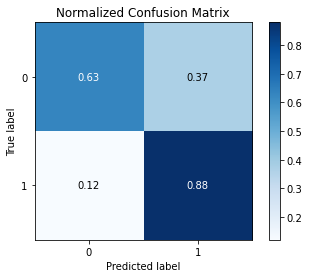

In [188]:
# Modelo final
modelo_gnb.fit(X_train, y_train)

# Fazer a previsão com os dados de treino
y_pred_train = modelo_gnb.predict(X_train)

# Relatório de Classificação
print(classification_report(y_train, y_pred_train))

# Obtendo a área sob a curva ROC (AUC)
print("AUC: {:.4f}\n".format(roc_auc_score(y_train, y_pred_train)))

# plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_train, y_pred_train, normalize=True);

Nosso modelo dentro do ambiente de treino obteve as seguintes métricas:

* Acurácia = 76%;

* Recall = 88% para identificar aqueles que realmente foram teletransportados;

* Precisão = 71% para identificar aqueles que realmente foram teletransportados;

* Área Sob a Curva (AUC) = 0.75, que indica que o modelo é aceitável.

Agora vamos testar este modelo com os dados de teste que foram segmentados da base de treino.

# Testando os Dados de Teste que foram segmentados da base de Treino

No início da seção de modelagem, separamos 20% da base de treino para serem dados de teste, então vamos testar nosso modelo treinado com essas novas informações.

É importante lembrar que os dados de teste também devem ser submetidos aos mesmos tratamentos realizados no ambiente de treino, ou seja, também devemos aplicar a padronização neles:

              precision    recall  f1-score   support

           0       0.82      0.64      0.72       834
           1       0.71      0.86      0.78       864

    accuracy                           0.76      1698
   macro avg       0.77      0.75      0.75      1698
weighted avg       0.77      0.76      0.75      1698

AUC: 0.7530



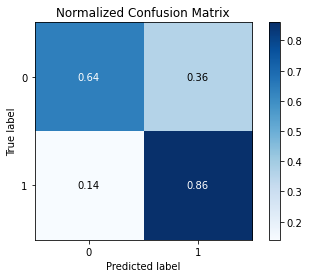

In [190]:
# Aplicando a Padronização
X_test = std.transform(X_test)

# Realizando a previsão
y_pred = modelo_gnb.predict(X_test)

# Relatório de Classificação
print(classification_report(y_test, y_pred))

# Obtendo a Área sob a Curva (AUC)
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True);

Ao prever novos dados, nosso modelo obteve as seguintes métricas:

* Acurácia = 76%;

* Recall = 86% para aqueles que foram realmente teletransportados;

* Precisão = 71% para aqueles que foram realmente teletransportados;

* Área sob a Curva (AUC): 0.75, indicação que o modelo é aceitável.

Podemos ver que os resultados não foram muito diferentes, o que é bom, pois mostra que nosso modelo não sofreu overfitting ou underfitting, conseguindo manter praticamente o mesmo desempenho que obteve durante o treinamento com os novos dados.

Em relação aos falsos positivos e negativos no nosso problema, tivemos uma `Precisão` até boa para o `Recall` de 86% obtido.

# Prevendo quem foi Teletransportado na Base de Teste

Ainda temos uma base de teste que não possui a informação sobre quem foi teletransportado, que tratamos junto com a base de treino.

Agora que temos nosso modelo treinado para solucionar o problema que é identificar quem foi teletransportado, vamos alimentá-lo com essa lista de passageiros que queremos identificar.

Devemos também padronizar os dados da base de teste, para que o modelo possa interpretá-los corretamente.

Primeiramente vamos checar o número de passageiros que queremos prever:

In [198]:
# Observando a quantidade de passageiros que queremos prever
base_teste_final.shape[0]

4177

Agora vamos realiar a padronização e prever quem foram os passageiros teletransportados de acordo com nosso modelo treinado:

In [193]:
# Padronizando os dados da base de teste
base_teste_final = std.transform(base_teste_final)

# Realizando a previsão
y_pred_final = modelo_gnb.predict(base_teste_final)

# Observando as previsões
y_pred_final

array([1, 0, 1, ..., 1, 1, 1])

Desses passageiros, quantos foram considerados pelo modelo como vítimas:

In [218]:
# Criando um DataFrame para visualizar as previsões
df_previsao = pd.DataFrame({'Previsão': y_pred_final})

# Checando o DataFrame
df_previsao['Previsão'].value_counts()

<IPython.core.display.Javascript object>

1    2611
0    1566
Name: Previsão, dtype: int64

In [215]:
# Obtendo a proporção dos passageiros considerados vítimas pelo modelo treinado
print('{:.2f}% dos passageiros informados foram considerados vítimas da Anomalia.'.format((2611/4177)*100))

62.51% dos passageiros informados foram considerados vítimas da Anomalia.


Vamos obter o nome desses passageiros: 

In [219]:
# Adicionando os nomes dos passageiros ao DataFrame com as previsões
df_previsao = df_previsao.join(base_teste_prep['Name'])

# Checando as primeiras entradas do DataFrame de Previsões com os respectivos nomes dos passageiros
df_previsao.head()

,Previsão,Name
0,1,Nelly Carsoning
1,0,Lerome Peckers
2,1,Sabih Unhearfus
3,1,Meratz Caltilter
4,1,Brence Harperez


# Conclusão

Infelizmente não é possível obter um modelo que irá prever 100% dos passageiros que foram afetados pela Anomalia, e por isso a análise exploratória realizada nos dados é bastante importante para levar Insights à equipe de resgate.

Com a análise exploratória, poderiamos passar para a equipe de resgate para darem prioridade na busca por aqueles passageiros que: 

* Estavam em sono criogênico;

* Estavam hospedados nas proximidades do setor de criogênia, e também nas cabines do lado direito da espaçonave nos Decks B e C; e

* São crianças e adolecentes;

Essas informações puramente analíticas podem ajudar a compensar a falta de um modelo com 100% de acurácia.

Com a modelagem da solução, obtivemos um modelo com 76% de acurácia, podendo identificar corretamente 86% dos casos apontados como positivo, em que os passageiros foram realmente afetados pela Anomalia.

Apesar dos esforços realizados para se obter um modelo com alto desempenho, ainda é possível testar outros algorítmos e técnicas de Machine Learning, desenvolver outras Features com o Feature Engineering, e também realizar outros tratamentos de dados, para se obter um modelo que possa ser superior ao desenvolvido neste projeto.

